In [ ]:
# default_exp core

# 第3章 Pandas数据处理

> API details.

In [6]:
#hide
from nbdev.showdoc import *

在上一章，我们详细介绍了NumPy和它的ndarray对象，这个对象为Python多维数组提供了高效的存储和处理方法。下面，我们将基于前面的知识，深入学习Pandas程序库提供的数据结构。Pandas是在Numpy基础上建立的新程序库，提供了一种高效的DataFrame数据结构。DataFrame本质上是一种带行标签和列标签、支持同类型数据和缺失值的多维数组。Pandas不仅为带各种标签的数据提供了便利的存储界面，还实现了许多强大的操作，这些操作对数据库框架和电子表格程序的用户来说非常熟悉。   
正如我们之前看到的那样，NumPy的ndarray数据结构为数值计算任务中常见的干净整齐、组织良好的数据提供了许多不可或缺的功能。虽然它在这方面做得很好，但是当我们需要处理更灵活的数据任务(如为数据添加标签、处理缺失值等)，或者需要做一些不是对每个元素都进行广播映射的计算(如分组、透视表)时，NumPy的限制就非常明显了，而这些都是分析各种非结构化数据时很重要的一部分。建立在NumPy数组解耦股上的Pandas，尤其是它的Series和DataFrame对象，为数据科学家处理那些消耗大量时间的"数据清理"(data munging)任务提供了捷径。   
本章将重点介绍Series、DataFrame和其他相关数据结构的高效使用方法。我们会酌情使用真实数据集作为演示示例，但这些示例本身并不是学习重点。

## 3.1 安装并使用Pandas     

在安装Pandas之前，确保你的操作系统中有NumPy。如果你是从源代码直接编译，那么还需要相应的工具编译建立Pandas所需的C语言与Cython代码。详细的安装方法，请参考Pandas官方文档(<http://pandas.pydata.org>)。如果你按照前言的建议使用了Anaconda，那么Pandas就已经安装好了。   
Pandas安装好之后，可以导入它检查一下版本号：   

In [1]:
import pandas
pandas.__version__

'1.0.3'

和之前导入NumPy并使用别名np一样，我们将导入Pandas并使用别名pd：

In [2]:
import pandas as pd

## 3.2 Pandas对象简介    

如果从底层视角观察Pandas对象，可以把它们看作增强版的NumPy结构化数组，行列都不再只是简单的整数索引，还可以带上标签。在本章后面的内容中我们将发现，虽然Pandas在基本数据结构上实现了许多便利的工具、方法和功能，但是后面将要介绍的每一个工具、方法和功能几乎都需要我们理解基本数据结构的内部细节。因此，在深入学习Pandas之前，先来看看Pandas的三个基本数据结构：Series、DataFrame和Index。从导入标准NumPy和Pandas开始：   

In [3]:
import numpy as np
import pandas as pd

### 3.2.1 Pandas的Series对象    

Pandas的Series对象是一个带索引数据构成的一维数组。可以用一个数组创建Series对象，如下所示：   

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

从上面的结果中，你会发现Series对象将一组数据和一组索引绑定在一起，我们可以通过values属性和index属性获取数据。values属性返回的结果与NumPy数组类似： 

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

index属性返回的结果是一个类型为pd.Index的类型组对象，我们将在后面的内容例详细介绍它： 

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

和NumPy数组一样，数据可以通过Python的中括号索引标签获取：

In [7]:
data[1]
data[1:3]

1    0.50
2    0.75
dtype: float64

但是我们将看到，Pandas的Series对象比它模仿的一维NumPy数组更加通用、灵活。   

1. Series是通用的Numpy数组：   
到目前为止，我们可能觉得Series对象和一维Numpy数组基本可以等价交换，但两者间的本质差异其实是索引：NumPy数组通过隐式定义的整数索引获取数值，而Pandas的Series对象用一种显示定义的索引与数值关联。   
显式索引的定义让Series对象拥有了更强的能力。例如，索引不再仅仅是整数，还可以是任意想要的类型。如果需要，完全可以用字符串定义索引：   

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

获取数值的方式与之前一样：   

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ['a', 'b', 'c', 'd'])
data['b']

0.5

也可以使用不连续或不按顺序的索引：   

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = [2, 5, 3, 7])
data

data[5]

0.5

2. Series是特殊的字典    
你可以把Pandas的Series对象看成是一种特殊的Python字典。字典是一种将任意键映射到一组任意值的数据结构，而Series对象其实是一种将类型键映射到一组类型值的数据结构。类型至关重要：就像NumPy数组背后特定类型的经过编译的代码使得它在某些操作上比普通的Python列表更加高效一样，Pandas Series的类型信息使得它在某些操作上比Python的字典更高效。   
我们可以直接用Python的字典创建一个Series对象，让Series对象与字典的类比更加清晰：   

In [13]:
population_dict = {'California' : 38332521,
                   'Texas' : 26448193,
                   'New York' : 19651127,
                   'Florida' : 19552860,
                   'Illinois' : 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

用字典创建Series时，其索引默认按照顺序排列。典型的字典数值获取方式仍然有效：  

In [14]:
population['California']

38332521

和字典不同，Series对象还支持数组形式的操作，比如切片： 

In [15]:
population['California' : 'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

我们将在3.3节中介绍Pandas取值与切片的一些技巧。
3. 创建Series对象   
我们已经见过几种创建Pandas的Series对象的方法，都是像这样的形式：   

其中，index是一个可选参数，data参数支持多种数据类型。   
例如，data可以是列表或NumPy数组，这时index默认值为整数序列：   

In [17]:
import pandas as pd
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

data也可以是一个标量，创建Series对象时会重复填充到每个索引上：

In [18]:
pd.Series(5, index = [100, 200, 300])

100    5
200    5
300    5
dtype: int64

data还可以是一个字典，index默认是排序的字典键：

In [19]:
pd.Series({2 : 'a', 1 : 'b', 3 : 'c'})

2    a
1    b
3    c
dtype: object

每一种形式都可以通过显式指定索引筛选需要的结果：   

In [21]:
pd.Series({2 : 'a', 1 : 'b', 3 : 'c'}, index = [3, 2])

3    c
2    a
dtype: object

这里需要注意的是，Series对象只会保留显式定义的键值对。   

### 3.2.2 Pandas的DateFrame对象    

Pandas的另一个基础数据结构是DataFrame。和上一节介绍的Series对象一样，DataFrame既可以作为一个通用型NumPy数组，也可以看做特殊的Python字典。下面来分别看看。   

1. DataFrame是通用的NumPy数组   
如果将Series类比为带灵活索引的一维数组，那么DataFrame就可以看作是一种既有灵活的行索引，又有灵活列名的二维数组。就像你可以把二维数组看成是有序排列的一维数组一样，你也可以把DataFrame看作是有序排列的若干Series对象。这里的"排列"指的是它们拥有共同的索引。   
下面用上一节中美国五个州面积的数据创建的一个新的Series来进行演示：   

In [22]:
area_dict = {'California' : 423967, 
             'Texas' : '69562', 
             'New York' : 141297,
             'Florida' : 170312, 
             'Illinois' : 149995}
area = pd.Series(area_dict)
area

California    423967
Texas          69562
New York      141297
Florida       170312
Illinois      149995
dtype: object

再结合之前创建的population的Series对象，用一个字典创建一个包含这些信息的二维对象：   

In [23]:
states = pd.DataFrame({'population' : population,
                      'area' : area})
states

,population,area
California,38332521,423967
Texas,26448193,69562
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


和Series对象一样，DataFrame也有一个index属性可以获取索引标签：   

In [24]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

另外，DataFrame还有一个columns属性，是存放列标签的Index对象：   

In [25]:
states.columns

Index(['population', 'area'], dtype='object')

因此DataFrame可以看作一个通用的NumPy二维数组，它的行与列都可以通过索引获取。
2. DataFrame是特殊的字典    
与Series类似，我们也可以把DataFrame看成一个特殊的字典。字典是一个键映射一个值，而DataFrame是一个列映射一个Series的数据。例如，通过'area'的列属性可以返回包含面积数据的Series对象：   

In [26]:
states['area']

California    423967
Texas          69562
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: object

这里需要注意的是，在NumPy的二维数组中，data[0]返回第一行；而在DataFrame中，data['col0']返回第一列。因此，最好把DataFrame看成一种通用字典，而不是普通的数组，即使这两种看法在不同情况下都是有用的。3.3节将介绍更多DataFrame灵活取值的方法。
3. 创建DataFrame对象   
Pandas的DataFrame对象可以通过许多方法创建，这里举几个常用的例子。   
(1) 通过单个Series对象创建。DataFrame是一组Series对象的集合，可以用单个Series创建一个单列的DataFrame：   

In [27]:
pd.DataFrame(population, columns = ['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


(2) 通过字典列表创建。任何元素是字典的列表都可以变成DataFrame。用一个简单的列表综合来创建一些数据：   

In [28]:
data = [{'a' : i, 'b' : 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


即使字典中有些键不存在，Pandas也会用缺失值NaN(不是数字，not a number)来表示： 

In [29]:
pd.DataFrame([{'a' : 1, 'b' : 2}, {'b' : 3, 'c' : 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


(3) 通过Series对象字典创建，就像之前见过的那样，DataFrame也可以用一个由Series对象构成的字典创建：

In [30]:
pd.DataFrame({'population' : population,
              'area' : area})

,population,area
California,38332521,423967
Texas,26448193,69562
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


(4) 通过NumPy二维数组创建。假如有一个二维数组，就可以创建一个可以指定行列索引值的DataFrame。如果不指定行列索引值，那么行列默认都是整数索引值：   

In [31]:
pd.DataFrame(np.random.rand(3, 2),
             columns = ['foo', 'bar'],
             index = ['a', 'b', 'c'])

,foo,bar
a,0.071432,0.382659
b,0.675545,0.252519
c,0.342136,0.922468


(5) 通过NumPy结构化数组创建。2.9节曾介绍过结构化数组。由于Pandas的DataFrame与结构化数组十分相似，因此可以通过结构化数组创建DataFrame：

In [32]:
A = np.zeros(3, dtype = [('A', 'i8'), ('B', 'f8')])

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [33]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### 3.2.3 Pandas的Index对象    

我们已经发现，Series和DataFrame对象都使用便于引用和调整的显示索引。Pandas的Index对象是一个很有趣的数据结构，可以将它看作是一个不可变数组或有序集合(实际上是一个多集，因为Index对象可能会包含重复值)。这两种观点使得Index对象能呈现一些有趣的功能。让我们用一个简单的整数列表来创建一个Index对象：   

In [34]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

1. 将Index看作不可变数组   
Index对象的许多操作都像数组。例如，可以通过标准Python的取值方法获取数值，也可以通过切片获取数值：

In [36]:
ind[1]

3

In [37]:
ind[:: 2]

Int64Index([2, 5, 11], dtype='int64')

Index对象还有许多与NumPy数组相似的属性：  

In [38]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


Index对象与NumPy数组之间的不同在于，Index对象的索引是不可变的，也就是说不能通过通常的方式进行调整：

In [39]:
ind[1] = 0

TypeError: Index does not support mutable operations

Index对象的不可变特征使得多个DataFrame和数组之间进行索引共享时更加安全，尤其是可以避免因修改索引时粗心大意而导致的副作用。
2. 将Index看作有序集合    
Pandas对象被设计用于实现许多操作，如连接(join)数据集，其中会涉及许多集合操作。Index对象遵循Python标准库的集合(set)数据结构的许多习惯用法，包括并集、交集、差集等：  

In [40]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [41]:
indA & indB   # 交集

Int64Index([3, 5, 7], dtype='int64')

In [42]:
indA | indB   # 并集

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [43]:
indA ^ indB   #异或

Int64Index([1, 2, 9, 11], dtype='int64')

这些操作还可以通过调用对象方法来实现，例如indA.intersection(indB)。   

## 3.3 数据取值与选择    

第2章具体介绍了获取、设置、调整NumPy数组数值的方法与工具，包括取值操作(如arr[2, 1])、切片 操作(如arr[:, 1:5])、掩码操作(如arr[arr > 0])、花式索引操作(如arr[0, [1, 5]])，以及组合操 作(如arr[:, [1, 5]])。下面介绍Pandas的Series和DataFrame对象相似的数据获取与调整操作。如果你用过NumPy操作模式，就会非常熟悉Pandas的操作模式，只是有几个细节需要注意一下。   
我们将从简单的一维Series对象开始，然后再用比较复杂的二维DataFrame对象进行演示。   

### 3.3.1 Series数据选择方法    

如前所述，Series对象与一维NumPy数组和标准Python字典在许多方面一样。只要牢牢记住这两个类比，就可以帮助我们更好地理解Series对象的数据索引与选择模式。   

1. 将Series看作字典   
和字典一样，Series对象提供了键值对的映射：   

In [44]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ['a', 'b', 'c', 'd'])
data

data['b']

0.5

我们还可以用Python字典的表达式和方法来检测键/索引和值：   

In [46]:
'a' in data

True

In [47]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [48]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Series对象还可以用字典语法调整数据。就像你可以通过增加新的键扩展字典一样，你也可以通过新的索引值扩展Series：

In [49]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

Series对象的可变性是一个非常方便的特性：Pandas在底层已经为可能发生的内存布局和数据复制自动决策，用户不用担心这些问题。
2. 将Series看作一维数组    
Series不仅有着和字典一样的接口，而且还具备和NumPy数组一样的数组数据选择功能，包括索引、掩码、花式索引等操作，具体事例如下所示：

In [50]:
# 将显示索引作为切片
data['a' : 'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [51]:
# 将隐式整数索引作为切片
data[0 : 2]

a    0.25
b    0.50
dtype: float64

In [52]:
#掩码
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [53]:
# 花式索引
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

在以上示例中，切片时绝大部分混乱之源。需要注意的是，当使用显示索引(即data['a' : 'c'])作切 片时，结果包含最后一个索引，而当使用隐式索引(即data[0 : 2])作切片时，结果不包含最后一个索 引。
3. 索引器：loc、iloc和ix   
这些切片和取值的习惯用法经常会造成混乱。例如，如果你的Series是显式整数索引，那么data[1]这样的取值操作会使用显示索引，而data[1:3]这样的切片操作却会使用隐式索引。   

In [54]:
data = pd.Series(['a', 'b', 'c'], index = [1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [55]:
# 取值操作时显示索引
data[1]

'a'

In [56]:
# 切片操作时隐式索引
data[1:3]

3    b
5    c
dtype: object

由于整数索引很容易造成混淆，所以Pandas提供了一些索引器(indexer)属性来作为取值的方法。它们不是Series对象的函数方法，而是暴露切片接口的属性。   
第一种索引器是loc属性，表示取值和切片都是显示的：   

In [57]:
data.loc[1] 

'a'

In [58]:
data.loc[1:3]

1    a
3    b
dtype: object

第二种是iloc属性，表示取值和切片都是Python形式的(从0开始，左闭右开区间)隐式索引： 

In [59]:
data.iloc[1]

'b'

In [60]:
data.iloc[1:3]

3    b
5    c
dtype: object

第三种取值属性是ix，它是前两种索引器的混合形式，在Series对象中ix等价于标准的[](Python)列表取值方式。ix索引器主要用于DataFrame对象，后面将会介绍。   
Python代码的设计原则之一是"显示优于隐式"。使用loc和iloc可以让代码更容易维护，可读性更高。特别是在处理整数索引的对象时，我们强烈推荐使用这两种索引器。它们既可以让代码阅读和理解起来更容易，也能避免因误用索引/切片而产生的小bug。   

### 3.3.2 DataFrame数据选择方法    

前面曾提到，DataFrame在有些方面像二维或结构化数组，在有些方面又像一个共享索引的若干Series对象构成的字典。这两种类比可以帮助我们更好地掌握这种数据结构的数据选择方法：   

1. 将DataFrame看作字典   
第一种类比是DataFrame当作一个由若干Series对象构成的字典。让我们用之前的美国五洲面积与人口数据来演示：   

In [61]:
area = pd.Series({'California':423967, 'Texas':695662,
                  'New York':141297, 'Florida':170312,
                  'Illinois':149995})
pop = pd.Series({'California':38332521, 'Texas':26448193,
                 'New York':19651127, 'Florida':19552860,
                 'Illinois':12882135})
data = pd.DataFrame({'area':area, 'pop':pop})

data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


两个Series分别构成DataFrame的一列，可以通过对列名进行字典形式(dictionary-style)的取值获取数据：  

In [62]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

同样，也可以用属性形式(attribute-style)选择纯字符串列名的数据：  

In [63]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

对同一个对象进行属性形式与字典形式的列数据，结果是相同的：   

In [64]:
data.area is data['area']

True

虽然属性形式的数据选择方法很方便，但是它并不是通用的。如果列名不是纯字符串，或者列名与DataFrame的方法同名，那么就不能用属性索引。例如，DataFrame有一个pop()方法，如果用data.pop就不会获取'pop'列，而是显示为方法：   

In [65]:
data['pop']

data.pop

data['pop'] is data.pop

False

另外，还应该避免对用属性形式选择的列直接赋值(即可以用data['pop'] = z，但不要用data.pop = z)。   
和前面介绍的Series对象一样，还可以用字典形式的语法调整对象，如果想要增加一列可以这样做：  

In [67]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


这里演示了两个series对象算术运算的简便语法，我们将在3.4节进行详细介绍。
2. 将DataFrame看作二维数组    
前面曾提及，可以把DataFrame看成一个增强版的二维数组，用values属性按行查看数组数据：   

In [68]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

理解了这一点，就可以把许多数组操作方式用在DataFrame上。例如，可以对DataFrame进行行列转置： 

In [69]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


通过字典形式对列进行取值显然会限制我们把DataFrame作为NumPy数组可以获得的能力，尤其是当我们在DataFrame数组中使用单个行索引获取一行数据时： 

In [70]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

而获取一列数据就需要向DataFrame传递单个列索引：   

In [71]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

因此，在进行数组形式的取值时，我们就需要用另一种方法——前面介绍过的Pandas索引器loc、iloc和ix了。通过iloc索引器，我们就可以像对待NumPy数组一样索引Pandas的底层数组(Python的隐式索引)，DataFrame的行列标签会自动保留在结果中：   

In [72]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [73]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


使用ix索引器可以实现一种混合效果：   

In [74]:
data.ix[:3, :'pop']

AttributeError: 'DataFrame' object has no attribute 'ix'

需要注意的是，ix索引器对于整数索引的处理和之前在Series对象中介绍的一样，都容易让人混淆。   
任何用于处理NumPy形式数据的方法都可以用于这些索引器。例如，可以在loc索引器中结合使用掩码与花式索引方法：

In [75]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


任何一种取值方法都可以用于调整数据，这一点和NumPy的常用方法是相同的：  

In [76]:
data.iloc[0, 2] = 90
data   

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


如果你想熟练使用Pandas的数据操作方法，我建议你花点时间在一个简单的DataFrame上练习不同的取值方法，包括查看索引类型、切片、掩码和花式索引操作。
3. 其他取值方法   
还有一些取值方法和前面介绍过的方法不太一样。它们虽然看着有点奇怪，但是在实践中还是很好用的。首先，如果对单个标签取值就选择列，而对多个标签用切片就选择行：   

In [77]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


切片也可以不用索引值，而直接使用行数来实现：

In [78]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


与之类似，掩码操作也可以直接对每一行进行过滤，而不需要使用loc索引器：   

In [79]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


这两种操作方法其实与NumPy数组的语法类似，虽然它们与Pandas的操作习惯不太一致，但是在实践中非常好用。   

## 3.4 Pandas数值运算方法    

NumPy的基本能力之一是快速对每个元素进行运算，既包括基本算术运算(加、减、乘、除)，也包括更复杂的运算(三角函数、指数函数和对数函数)。Pandas继承了NumPy的功能，在2.3节介绍过的通用函数是关键。    
但是Pandas也实现了一些高效技巧：对于一元运算(像函数与三角函数)，这些通过函数将在输出结果中保留索引和列标签；而对于二元运算(如加法和乘法)，Pandas在出传递通用函数时会自动对齐索引进行计算。这就意味着，保存数据内容与组合不同来源的数据——两处在NumPy数组中国容易出错的地方——变成了Pandas的杀手锏。后面还会介绍一些关于一维Series和二维DataFrame的便捷运算方法。   

### 3.4.1 通用函数：保留索引    

因为Pandas是建立在NumPy基础之上的，所以NumPy的通用函数同样适用于Pandas的Series和DataFrame对象。让我们用一个简单的Series和DataFrame来演示：   

In [80]:
import pandas as pd
import numpy as np

rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [81]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


如果对两个对象中的其中一个使用NumPy通用函数，生成的结果是另一个保留索引的Pandas对象： 

In [82]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

或者，再做一个比较复杂的运算：

In [83]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


任何一种在2.3节介绍过的通用函数都可以按照类似的方式使用。   

### 3.4.2 通用函数：索引对齐    

当在两个Series或DataFrame对象上进行二元计算时，Pandas会在计算过程中对齐两个对象的索引。当你处理不完整数据时，这一点非常方便，我们将在后面的示例中看到。   

1. Series索引对齐   
来看一个例子，加入你要整合两个数据源的数据，其中一个是美国面积最大的三个州的面积数据，另一个是美国人口最多的三个州的人口数据：  

In [84]:
area = pd.Series({'Alaska' : 1723337, 'Texas' : 695662,
                  'California' : 423967}, name = 'area')
population = pd.Series({'California' : 38332521, 'Texas' : 26448193,
                        'New York' : 19651127}, name = 'population')

来看看如果用人口除以面积会得到什么样的结果： 

In [85]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

结果数组的索引是两个输入数组索引的并集。我们也可以应Python标准库的集合运算法则来获得这个索引： 

In [86]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

对于缺失位置的数据，Pandas会用NaN填充，表示"此处无数"。这是Pandas表示缺失值的方法(详情请参见3.5节关于缺失值的介绍)。这种索引对齐方式是通过Python内置的集合运算规则实现的，任何缺失默认都用NaN填充：

In [87]:
A = pd.Series([2, 4, 6], index = [0, 1, 2])
B = pd.Series([1, 3, 5], index = [1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

如果用NaN值不是我们想要的结果，那么可以用适当的对象方法代替运算符。例如，A.add(B)等价于A + B，也可以设置参数自定义A或B缺失的数据： 

In [88]:
A.add(B, fill_value = 0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

2. DataFrame索引对齐   
在计算两个DataFrame时，类似的索引对齐规则也同样会出现在共同(并集)列中： 

In [89]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns = list('AB'))
A

,A,B
0,1,11
1,5,1


In [90]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns = list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [91]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


你会发现，两个对象的行列索引可以是不同顺序的，结果的索引会自动按顺序排列。在Series中，我们可以通过运算符方法的fill_value参数自定义缺失值。这里，我们将用A中所有值的均值来填充缺失值(计算A的均值需要用stack将二维数组压缩成一维数组)：  

In [92]:
fill = A.stack().mean()
A.add(B, fill_value = fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


表3-1列举了与Python运算符相对应的Pandas对象方法。   
$$
\text{表3-1：Pytnon运算符与Pandas方法的映射关系}  \\
\begin{array}{l|l}
\hline
\text{Python运算符} & \text{Pandas方法}   \\
\hline
\text{+} & \text{add()}  \\
\text{-} & \text{subtract()}  \\
\text{*} & \text{mul()、multiply()}  \\
\text{/} & \text{truediv()、divide()}  \\
\text{//} & \text{floordiv()}  \\
\text{%} & \text{mod()}  \\
\text{**} & \text{pow()}  \\
\hline
\end{array}
$$
### 3.4.3 通用函数：DataFrame与Series的运用    

我们经常需要对一个DataFrame和一个Series进行计算，行列对齐方式与之前类似。也就是说，DataFrame和Series的运算规则，与NumPy中二维数组与一维数组的运算跪着是一样的。来看一个常见运算，让一个二维数组减去一个自身的一行数据：   

In [93]:
A = rng.randint(10, size = (3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [94]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

根据NumPy的广播规则(见2.5节)，让二维数组减自身的一行数据会按行计算。在Pandas里默认也是按行运算的：

In [95]:
df = pd.DataFrame(A, columns = list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


如果你想按列计算，那么就需要利用前面介绍过的运算符方法，通过axis参数设置：

In [96]:
df.subtract(df['R'], axis = 0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


你会发现DataFrame / Series的运算与前面介绍的运算一样，结果的索引都会自动对齐：   

In [97]:
halfrow = df.iloc[0, ::2]
halfrow

df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


这些行列索引的保留与对齐方法说明Pandas在运算时会一直保存这些数据内容，从而避免在处理数据类型有差异和/或维度不一致的NumPy数组时可能遇到的问题。   

## 3.5 从处理缺失值   

大多数教程里使用的数据与现实工作中的数据的区别在于后者很少是干净整齐的。许多目前流行的数据集都会有数据缺失的现象。更为甚者，处理不同数据源缺失值的方法还不相同。   
我们将在本节介绍一些处理缺失值的通用规则，Pandas对缺失值的表现形式，并演示Pandas自带的几个处理缺失值的工具的用法。本节以及全书涉及的缺失值主要有三种形式：null、NaN、NA。   

### 3.5.1 选择处理缺失值的方法    

在数据表或DataFrame中有很多识别缺失值的方法。一般情况下可以分为两种：一种方法是通过一个覆盖全局的掩码表示缺失值，另一种方法是硬一个标签值(sentinel value)表示缺失值。   
在掩码方法中，掩码可能是一个与原数组相同的完整布尔类型数组，也可能是用衣蛾比特(0或1)表示由缺失值的局部状态。   
在标签方法，标签值可能是具体的数据(例如-9999表示缺失的整数)，也可能是些极少出现的形式。另外，标签值还可能是更全局的值，比如用NaN(不是一个数)表示缺失的浮点数，它是IEEE浮点数规范中指定的特殊字符。   
使用这两种方法之前都需要先综合考虑：使用单独的掩码数组会额外出现一个布尔类型数组，从而增加存储与计算的负担；而标签方法缩小了可以被表示为有效值的范围，可能需要在CPU或GPU算术逻辑单元中增加额外的(往往也不是最优的)计算逻辑。通常使用的NaN也不能表示所有数据类型。   
大多数情况下，都不存在最佳选择，不同的编程语言与系统使用不同的方法。例如，R语言在每种数据类型中保留一个比特作为缺失数据的标签值，而SciDB系统会在每个单元后面加个额外的字节表示NA状态。   

### 3.5.2 Pandas的缺失值   

Pandas里处理缺失值的方式延续了NumPy程序包的方式，并没有为浮点数据类型提供内置的NA作为缺失值。   
Pandas原本也可以按照R语言采用的比特模式为每一种数据类型标注缺失值，但是这种方法非常笨拙。R语言包含4种基本数据类型，而NumPy之词能够的类型远超4中。例如，R语言只用一种整数类型，而NumPy支持14种基本的整数类型，可以感觉精度、符号、编码类型按需选择。如果要为NumPy的每种数据类型都设置一个比特标注缺失值，可能需要为不同类型的不同操作耗费大量的时间与精力，其工作量几乎相当于创建一个新的NumPy程序包。另外，对于一些较小的数据类型(例如8位整型数据)，牺牲一个比特作为缺失值的掩码还会导致其数据法案为缩小。   
当然，NumPy也是支持掩码数据的，也就是说可以用一个布尔掩码数组为原数组标注"无缺失值"或"有缺失值"。Pandas也集成了这个功能，但是在存储、计算和编码维护方面都需要耗费不必要的资源，因此这种方式并不可取。   
综合考虑各种方法的优缺点，Pandas最终选择用标签方法表示缺失值，包括两种Python原有的缺失值：浮点数据类型的NaN值，以及Python的None对象。后面我们将会发现，虽然这么做也会有一些副作用，但是在实际运用中的效果还是不错的。   

1. None：Python对象类型的缺失值   
Pandas可以使用的第一种缺失值标签是None，它是一个Python单体对象，经常在代码中表示缺失值。由于None是一个Python对象，所以不能作为任何Numpy / Pandas数组类型的缺失值，只能用于'object '数组类型(即由Python对象构成的数组)：   

In [98]:
import numpy as np
import pandas as pd

vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

这里的dtype = object表示NumPy认为由于这个数组是Python对象构成的，因此将其类型判断为object。虽然这种类型在某些情景中非常有用，对数据的任何操作最终也会在Python层面完成，但是在进行常见的快速操作时，这种类型比其他原生类型数组要消耗更多的资源：   

In [99]:
import numpy as np
import pandas as pd

for dtype in ['object', 'int']:
    print('dtype = ', dtype)
    %timeit np.arange(1E6, dtype = dtype).sum()
    print()

dtype =  object
51.7 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype =  int
1.79 ms ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



使用Python对象构成的数组就意味着如果你对一个包含None的数组进行累计操作，如sum()或者min()，那么通常会出现类型错误：

In [100]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

这就是说，在Python中没有定义整数与None之间的加法运算。
2. NaN：数值类型的缺失值    
另一种缺失值的标签是NaN(全称Not a Number，不是一个数字)，是一种按照IEEE浮点数标准设计、在任何系统中都兼容的特殊浮点数： 

In [101]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

请注意，NumPy会为这个数组选择一个原生浮点类型，这意味着和之前的object类型数组不同，这个数组会被编译成C代码从而实现快速操作。你可以把NaN看作是一个数据类病毒——它会将与它接触过的数据同化无论和NaN进行何种操作，最终结果都是NaN：  

In [102]:
1 + np.nan

nan

In [103]:
0 * np.nan

nan

虽然这些累计操作的结果定义是合理的(即不会抛出异常)，但是并非总是有效的： 

In [104]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy也提供了一些特殊的累计函数，它们可以忽略缺失值的影响：

In [106]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

谨记，NaN是一种特殊类型的浮点数，不是整数、字符串以及其他数据类型。
3. Pandas中NaN与None的差异   
虽然NaN与None各有各的用处，但是Pandas把它们看成是可以等价交换的，在适当的时候会将两者进行替换：

In [107]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Pandas会将没有标签值的数据类型自动转换为NA。例如，当我们将整型数组中的一个值设置为np.nan时，这个值就会强制转换为浮点数缺失值NA。   

In [108]:
x = pd.Series(range(2), dtype = int)
x

0    0
1    1
dtype: int32

In [109]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

请注意，除了将整型数组的缺失值强制转换为浮点数，Pandas还会自动将None转换为NaN。(需要注意的是，现在GitHub上Pandas项目中已经有人提议增加一个原生的整型NA，不过到编写本书时尚未实现。)    
尽管这些方法会魔法的类型比R语言等专用统计语言的缺失值要复杂一些，但是Pandas的标签/转换方法在实践中的效果非常好，在我个人的使用过程中几乎没有出过问题。   
Pandas对NA缺失值进行强制转换的规则如表3-2所示。    
$$
\text{表3-2：Pandas对不同类型缺失值的转换规则}  \\
\begin{array}{l|l|l}
\hline
\text{类型} & \text{缺失值转换规则} & \text{NA标签值}  \\
\hline
\text{floating浮点型} & \text{无变化} & \text{np.nan}  \\
\text{object对象类型} & \text{无变化} & \text{None或np.nan}  \\
\text{integer整数类型} & \text{强制转换为float64} & \text{np.nan}  \\
\text{boolean布尔类型} & \text{强制转换为object} & \text{None或np.nan}  \\
\hline
\end{array}
$$
需要注意的是，Pandas中字符串类型的数据通常是用object类型存储的。   

### 3.5.3 处理缺失值    

我们已经知道，Pandas基本上把None和NaN看成是可以等价交换的缺失值形式。为了完成这种交换过程，Pandas提供了一些方法来发现、剔除、替换数据结构中的缺失值，主要包括以下几种。   

创建一个布尔类型的掩码标签缺失值。 

与isnull()操作相反。

返回一个剔除缺失值的数据。

返回一个填充了缺失值的数据副本。    

1. 发现缺失值    
Pandas数据结构有两种有效的方法可以发现缺失值：isnull()和notnull()。每种方法都返回布尔类型的掩码数据，例如：   

In [110]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

就像在3.3节中介绍的，布尔类型掩码数组可以直接作为Series或DataFrame的索引使用：

In [111]:
data[data.notnull()]

0        1
2    hello
dtype: object

在Series例使用的isnull()和notnull()同样适用于DataFrame，产生的结果同样是布尔类型。
2. 剔除缺失值    
除了前面介绍的掩码方法，还有两种很好用的缺失值处理方法，分别是dropna()(剔除缺失值)和fillna()(填充缺失值)。在Series上使用这些方法非常简单：   

In [112]:
data.dropna()

0        1
2    hello
dtype: object

而在DataFrame上使用它们是需要设置一些参数，例如下面的DataFrame： 

In [113]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


我们没法从DataFrame中单独剔除一个值，要么是剔除缺失值所在的整行，要么是整列。根据实际需求，有时你需要剔除整行，有时可能是整列，DataFrame中的dropna()会有一些参数可以配置。   
默认情况下，dropna()会剔除任何包含缺失值的整行数据：   

In [114]:
df.dropna()

,0,1,2
1,2.0,3.0,5


可以设置不同的坐标轴剔除缺失值，比如axis = 1(或axis = 'columns')会剔除任何包含缺失值的整 列数据：

In [115]:
df.dropna(axis = 1)
df.dropna(axis = 'columns')

,2
0,2
1,5
2,6


但是这么做也会把非缺失值一并剔除，因为可能有时候只需要剔除全部是缺失值的行或列，或者绝大多数是缺失值的行或列。这些需求可以通过设置how或thresh参数来满足，它们可以设置剔除行或列缺失值的数量阈值。   
默认设置是how = 'any'，也就是说只要是缺失值就剔除整行或整列(通过axis设置坐标轴)。你还可以设置how = 'all'，这样就只会剔除全部是缺失值的行或列了：   

In [116]:
df[3] = np.nan
df

df.dropna(axis = 'columns', how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


还可以通过thresh参数设置行或列中非缺失值的最小数量，从而实现更加个性化的配置： 

In [117]:
df.dropna(axis = 'rows', thresh = 3)

,0,1,2,3
1,2.0,3.0,5,NaN


第1行和第3行被删除了，因为它们只包含两个非缺失值。
3. 填充缺失值    
有时候你可能并不想移除缺失值，而是想把它们替换成有效的数值。有效的数值可能是像0、1、2那样单独的值，也可能是经过填充(imputation)或转换(interpolation)得到的。虽然你可以通过isnall()方法建立掩码来填充缺失值，但是Pandas为此专门提供了一个fillna()方法，它将返回填充了缺失值后的数组副本。   
来用下面的Series演示：   

In [118]:
data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

我们将一个单独的值来填充缺失值，例如用0：

In [119]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

可以用缺失值前面的有效值来从前往后填充(forward-fill)：  

In [120]:
# 从前往后填充
data.fillna(method = 'ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

也可以用缺失值后面的有效值来从后往前填充(back-fill)：  

In [121]:
#从后往前填充
data.fillna(method = 'bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

DataFrame的操作方法与Series类似，只是在填充时需要设置坐标轴参数axis：   

In [122]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

df.fillna(method = 'ffill', axis = 1)

,0,1,2
0,1.0,1.0,2.0
1,2.0,3.0,5.0
2,NaN,4.0,6.0


需要注意的是，假如在从前往后填充时，需要填充的缺失值前没有值，那么他就仍然是缺失值。   

## 3.6 层级索引    

当目前为止，我们接触的都是一维数据和二维数据，用Pandas的Series和DataFrame对象就可以存储。但我们也经常会遇到存储多维数据的需求，数据索引超过一两个键。因此，Pandas提供了Panel和Panel4D对象解决三维数据与四维数据(见3.7节)。而在实践中，更直观的形式是通过层级索引(hierarchical indexing，也被称为多级索引，multi-indexing)配合多个不同等级(level)的一级索引一起使用，这样就可以将高维数组转换为类似一维Series和二维DataFrame对象的形式。   
在这一节中，我们将介绍创建MultiIndex对象的方法，多级索引数据的取值、切片和统计值的计算，以及普通索引与层级索引的转换方法。    
首先导入Pandas和NumPy：   

In [123]:
import pandas as pd
import numpy as np 

### 3.6.1 多级索引Series    

让我们看看如何用一维的Series对象表示二维数据——用一系列包含特征与数值的数据点来简单演示。
  
1. 笨办法    
假设你想要分析美国各州在两个不同年份的数据。如果你用前面介绍的Pandas工具来处理，那么可能会用一个Python元组来表示索引：   

In [124]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20051820, 25145561]
pop = pd.Series(populations, index = index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20051820
(Texas, 2010)         25145561
dtype: int64

通过元组构成的多级索引，你可以直接在Series上取值或用切片查询数据：

In [125]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20051820
dtype: int64

但是这么做很不方便。假如你想要选择所有2010年的数据，那么就得用一些比较复杂的(可能也比较慢的)清理方法了：   

In [126]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

这样做虽然也能得到需要的结果，但是与Pandas令人爱不释手的切片语法相比，这种方法确实不够简洁(在处理较大的数据时也不够高效)。
2. 好办法：Pandas多级索引     
好在Pandas提供了更好的解决方案。用元组表示索引其实是多级索引的基础。Pandas的MultiIndex类型提供了更丰富的操作方法。我们可以用元组创建了一个多级索引，如下所示：   

In [127]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

你会发现MultiIndex里面有一个levels属性表示索引的等级——这样做可以将州名和年份作为每个数据点的不同标签。   
如果将前面创建的pop的索引重置(reindex)为MultiIndex，就会看到层级索引：   

In [128]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20051820
            2010    25145561
dtype: int64

其中前两列表示Series的多级索引值，第三列是数据。你会发现有些行仿佛缺失了第一列数据——这其实是多级索引的表现形式，每个空格与上面的索引相同。   
现在可以直接用第二个索引获取2010年的全部数据，与Pandas的切片查询用法一致：  

In [129]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

结果是单索引的数组，正是我们需要的。与之前的元组索引相比，多级索引的语法更简洁。(操作也更方便！)下面继续介绍层级索引的取值操作方法。
3. 高维数组的多级索引   
你可能已经注意到，我们其实完全可以用一个带行列索引的简单DataFrame代替前面的多级索引。其实Pandas已经实现了类似的功能。unstack()方法可以快速将一个多级索引的Series转换为普通索引的DataFrame：

In [130]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20051820,25145561


当然，也有stack()方法实现相反的效果： 

In [131]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20051820
            2010    25145561
dtype: int64

你可能会纠结于为什么要费时间研究层级索引，其实理由很简单：如果我们可以用含多级索引的一维Series数据表示二维数据，那么我们就可以用Series或DataFrame表示三维甚至更高维的数据。多级索引每增加一级，就表示数据增加一维，利用这一特点就可以轻松表示任意维度的数据了。假如要增加一列显示每一年各州的人口统计指标(例如18岁以下的人口)，那么对于这种带有MultiIndex的对象，增加一列就像DataFrame的操作一样简单：

In [132]:
pop_df = pd.DataFrame({'total' : pop,
                       'under18' : [9267089, 9284094,
                                    4687374, 4318033,
                                    5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20051820  5906301
           2010  25145561  6879014

另外，所有在3.4节介绍过的通用函数和其他功能也同样适用于层级索引。我们可以计算上面数据中18岁以下的人口占总人口的比例：   

In [133]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.294552,0.273568


同样，我们也可以快速浏览和操作高维数据。   

### 3.6.2 多级索引的创建方法   

为Series或DataFrame创建多级索引最直接的办法就是将index参数设置为至少二维的索引数组，如下所示： 

In [134]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index = [['a', 'a', 'b', 'b'],
                           [1, 2, 1, 2]],
                  columns = ['data1', 'data2'])
df

data1     data2
a 1  0.380321  0.034246
  2  0.845414  0.591030
b 1  0.612902  0.076406
  2  0.871171  0.925675

MultiIndex的创建工作将在后台完成。   
同理，如果你把将元组作为键的字典传递给Pandas，Pandas也会默认转换为MultiIndex：

In [135]:
data = {('California', 2000) : 33871648,
        ('California', 2010) : 37253956,
        ('Texas', 2000) : 20851820,
        ('Texas', 2010) : 25145561,
        ('New York', 2000) : 18976451,
        ('New York', 2010) : 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976451
            2010    19378102
dtype: int64

但是有时候显示地创建MultiIndex也是很有用的，下面来介绍一些创建方法。   

1. 显示地创建多级索引   
你可以用pd.MultiIndex中的类方法更加灵活地构建多级索引。例如，就像前面介绍的，你可以通过一个有不同等级的若干简单数组组成的列表来构建MultiIndex：   

In [136]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'],
                           [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

也可以通过包含多个索引值的元组构成的列表创建MultiIndex：   

In [137]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), 
                           ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

还可以用两个索引的笛卡尔积(Cartesian product)创建MultiIndex：  

In [138]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

更可以直接提供levels(包含每个等级的索引值列表的列表)和labels(包含每个索引值标签列表的列表)创建MultiIndex：   

In [139]:
pd.MultiIndex(levels = [['a', 'b'], [1, 2]],
              labels = [[0, 0, 1, 1], [0, 1, 0, 1]])

TypeError: __new__() got an unexpected keyword argument 'labels'

在创建Series或DataFrame时，可以将对象作为index参数，或者通过reindex方法更新Series或DataFr的索引。
2. 多级索引的等级名称    
给MultiIndex的等级加上名称会为一些操作提供便利。你可以在前面任何一个MultiIndex构造器中通过names参数设置等级名称，也可以在创建之后通过索引的names属性来修改名称：   

In [140]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20051820
            2010    25145561
dtype: int64

在处理复杂数据时，为等级设置名称是管理多个索引值的好办法。
3. 多级列索引   
每个DataFrame的行与列是对称的，也就是说既然有多级行索引，那么同样可以由多级列索引。让我们通过一份医学报告的模拟数据来演示：  

In [141]:
# 多级行列索引
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                  names = ['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                    names = ['subject', 'type'])

# 模拟数据
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

#创建DataFrame
health_data = pd.DataFrame(data, index = index, columns = columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      35.0  38.6  43.0  37.2  34.0  37.6
     2      44.0  36.6  28.0  35.7  25.0  35.1
2014 1      53.0  35.8  36.0  37.5  42.0  36.5
     2      23.0  35.6  40.0  38.1  50.0  36.6

多级行列索引的创建非常简单。上面创建了一个简易的思维数据，四个维度分别为被检查人的姓名、检查项目、检查年份和检查次数。可以在列索引的第一级查询姓名，从而获取包含一个人(例如Guido)全部检查信息的DataFrame：   

In [142]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      43.0  37.2
     2      28.0  35.7
2014 1      36.0  37.5
     2      40.0  38.1

如果想获取包含多种标签的数据，需要通过对多个维度(姓名、国家、城市等标签)的多次查询才能实现，这时使用多级行列索引进行查询会非常方便。   

### 3.6.3 多级索引的取值与切片   

对MultiIndex的取值和切片操作很直观，你可以直接把索引看作额外增加的维度。我们先来介绍Series多级索引的取值与切片方法，再介绍DataFrame的用法。   

1. Series多级索引    
看看下面有各州历年人口数量创建的多级索引Series： 

In [143]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20051820
            2010    25145561
dtype: int64

可以通过对多个级别索引值获取单个元素：

In [144]:
pop['California', 2000]

33871648

MultiIndex也支持局部取值(partial indexing)，即只取索引的某一个层级。假如只取最高级的索引 ，获得的结果是一个新的Series，未被选中的低层索引值会被保留：   

In [145]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

类似的还有局部切片，不过要求MultiIndex是按顺序排列的(见3.6.4节)：

In [146]:
pop.loc['California' : 'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

如果索引已经排序，那么可以用较低层级的索引取值，第一层级的索引可以用空切片：   

In [147]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20051820
dtype: int64

其他取值与数据选择的方法(见3.3节)也都起作用。下面的例子是通过布尔掩码选择数据：  

In [148]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

也可以用花式索引选择数据：

In [149]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20051820
            2010    25145561
dtype: int64

2. DataFrame多级索引    
DataFrame多级索引的用法与Series类似。还用之前的体检报告数据来演示：   

In [150]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      35.0  38.6  43.0  37.2  34.0  37.6
     2      44.0  36.6  28.0  35.7  25.0  35.1
2014 1      53.0  35.8  36.0  37.5  42.0  36.5
     2      23.0  35.6  40.0  38.1  50.0  36.6

由于DataFrame的基本索引是列索引，因此Series中多级索引的用法到了DataFrame中就应用到列上了。例如，可以简单的操作获取Guido的心率数据：   

In [151]:
health_data['Guido', 'HR']

year  visit
2013  1        43.0
      2        28.0
2014  1        36.0
      2        40.0
Name: (Guido, HR), dtype: float64

与单索引类似，在3.3节介绍的loc、iloc和ix索引器都可以使用，例如：   

In [152]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      35.0  38.6
     2      44.0  36.6

虽然这些索引器将多维数据当作二维数据处理，但是在loc和iloc中可以传递多个层级的索引元组，例如：

In [153]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        35.0
      2        44.0
2014  1        53.0
      2        23.0
Name: (Bob, HR), dtype: float64

这种索引元组的用法不是很方便，如果在元组中使用切片还会导致语法错误： 

In [154]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (<ipython-input-154-fb34fa30ac09>, line 1)

虽然你可以用Python内置的slice()函数获取想要的切片，但是还有一种更好的办法，就是使用IndexSlice对象。Pandas专门用它解决这类问题，例如：   

In [156]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,35.0,43.0,34.0
2014,1,53.0,36.0,42.0


和带多级索引的Series和DataFrame进行数据交互的方法有很多，但就像本书中的诸多工具一样，若要掌握他们，最好的办法就是使用它们！   

### 3.6.4 多级索引行列转换   

使用多级索引的关键是掌握有效数据转换的方法。Pandas提供了许多操作，可以让数据在内容保持不变的同时，按照需要进行行列转换。之前我们用一个简短的例子演示过stack()和unstack()的用法，但其实还有许多合理控制乘积行列索引的方法，让我们来一探究竟。    

1. 有序的索引和无序的索引    
在前面内容里，我们乘积简单提过多级索引排序，这里需要详细介绍一下。如果MultiIndex不是有序的索引，那么大多数切片操作都会失败。让我们演示一下。   
首先创建一个不按字典顺序(lexographically)排列的多级索引Series：   

In [157]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index = index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.054738
      2      0.236577
c     1      0.820071
      2      0.240205
b     1      0.726861
      2      0.185571
dtype: float64

如果想对索引使用局部切片，那么 错误就会出现：   

In [158]:
try:
   data['a':'b']
except KeyError as e:
   print(type(e))
   print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


尽管从错误信息里面看不出具体的细节，但问题是出在MultiIndex无序排列上。局部切片和许多其他相似的操作都要求MultiIndex的各级索引是有序的(即按照字典顺序由A至Z)。为此，Pandas提供了许多便捷的操作完成排序，如sort_index()和sortlevel()方法。我们用最简单的sort_index()方法来演示： 

In [159]:
data = data.sort_index()
data

char  int
a     1      0.054738
      2      0.236577
b     1      0.726861
      2      0.185571
c     1      0.820071
      2      0.240205
dtype: float64

索引排序之后，局部切片就可以正常使用了：

In [160]:
data['a' : 'b']

char  int
a     1      0.054738
      2      0.236577
b     1      0.726861
      2      0.185571
dtype: float64

2. 索引stack与unstack    
前文曾提及，我们可以将一个多级索引数据集转换成简单的二维形式，可以通过level参数设置转换的索引层级：   

In [161]:
pop.unstack(level = 0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20051820
2010,37253956,19378102,25145561


In [162]:
pop.unstack(level = 1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20051820,25145561


unstack()是stack()的逆操作，同时使用这两种操作让数据保持不变： 

In [163]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20051820
            2010    25145561
dtype: int64

3. 索引的设置与重置    
层级数据维度转换的另一种方法是列标签转换，可以通过reset_index方法实现。如如在上面的人口数据Series中使用该方法，则会生成一个列标签中包含之前行索引标签state和year的DataFrame。也可以用数据的name属性为列属性为列设置名称：   

In [164]:
pop_flat = pop.reset_index(name = 'population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20051820
5,Texas,2010,25145561


在解决实际问题的时候，如果能将类似这样的原始输入数据的列直接转换成MultiIndex，通常大有裨益。其实可以通过DataFrame的set_index方法实现，返回结果就会是一个带有多级索引的DataFrame：  

In [165]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20051820
           2010    25145561

在实践中，我发现用这种重建索引的方法处理数据集非常好用。   

### 3.6.5 多级索引的数据累计方法    

前面我们已经介绍过一些Pandas自带的数据累计方法，比如mean()、sum()和max()。而对于层级索引数据，可以设置参数level实现对数据子集的累计操作。   
再一次以体检数据为例：   

In [166]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      35.0  38.6  43.0  37.2  34.0  37.6
     2      44.0  36.6  28.0  35.7  25.0  35.1
2014 1      53.0  35.8  36.0  37.5  42.0  36.5
     2      23.0  35.6  40.0  38.1  50.0  36.6

如果你需要计算每一年各项指标的平均值，那么可以将参数level设置为索引year：

In [167]:
data_mean = health_data.mean(level = 'year')
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     39.5  37.6  35.5  36.45  29.5  36.35
2014     38.0  35.7  38.0  37.80  46.0  36.55

如果再设置axis参数，就可以对列索引进行类似的操作了：  

In [168]:
data_mean.mean(axis = 1, level = 'type')

type,HR,Temp
year,,
2013,34.833333,36.800000
2014,40.666667,36.683333


通过这两行数据，我们就可以获取每一年所有人的平均心率和体温了。这种语法其实就是GroupBy功能的快捷方式，我们将在3.9节详细介绍。尽管这只是一个简单的示例，但是其原理和实际工作中遇到的情况类似。    
**Panel数据**    
这里还有一些Pandas的基本数据结构没有介绍，包括pd.Panel对象和pd.Panel4D对象。这种数据结构可以分别看成是(一维数组)Series和(二维数组)DataFra的三维与四维形式。如果你熟悉Series和DataFrame的使用方法，那么Panel和Panel4D使用起来也会很简单，ix、loc和iloc索引器(详见3.3节)在高维结构上的用法完全相同。   
但是本书并不打算进一步介绍这两种数据结构，我个人认为多级索引在大多数情况下都是更实用、更直观的高维数据形式。另外，Panel采用密集数据存储形式，而多级索引采用稀疏数据存储形式。在解决许多真实的数据集时，随着维度的不断增加，密集数据存储形式的效率将越来越低。但是这类数据结构对一些特殊需求的应用还是有用的。如果你想对Panel与Panel4D数据结构有更多的认识，参见3.14节。   

## 3.7 合并数据集：Concat与Append操作   

将不同的数据源进行合并是数据科学中最有趣的事情之一，这既包括将两个不同的数据集非常简单地拼接在一起，也包括用数据库那样的连接(join)与合并(merge)操作处理有重叠字段的数据集。Series与DataFrame都具备这类操作，Pandas的函数与方法让数据合并变得快速简单。   
先来用pd.concat函数演示一个Series与DataFrame的简单合并操作。之后，我们将介绍Pandas中更复杂的merge和join内存数据合并操作。   
首先导入Pandas和Numpy：   

In [169]:
import pandas as pd
import numpy as np

简单起见，定义一个能够创建DataFrame某种形式的函数，后面将会用到：   

In [170]:
def make_df(cols, ind):
   '''一个简单的DataFrame'''
   data = {c : [str(c) + str(i) for i in ind]
           for c in cols}
   return pd.DataFrame(data, ind)

# DataFrame示例
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### 3.7.1 知识回顾：NumPy数组的合并    

合并Series与DataFrame与合并NumPy数组基本相同，后者通过2.2节中 介绍的np.concatente函数即 可完成。你可以用这个函数将两个或两个以上的数组合并成一个数组。   

In [171]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

第一个参数是需要合并的数组列表或元组，还有一个axis参数可以设置合并的坐标轴方向：

In [172]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### 3.7.2 通过pd.cincat实现简易合并    

Pandas有一个pd.concat()函数与np.concatenate语法类似，但是配置参数更多，功能也更强大：  

pd.concat()可以简单地合并一维的Series或DataFrame对象，与np.concatenate()合并数组一样：

In [174]:
ser1 = pd.Series(['A', 'B', 'C'], index = [1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index = [4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

它也可以用来合并高维数据，例如下面的DataFrame：   

In [175]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2);print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


默认情况下，DataFrame的合并都是逐行进行的(默认设置是axis = 0)。与np.concatenate()一样，p d.concat也可以设置合并坐标轴，例如下面的示例：   

In [176]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4);print(pd.concat([df3, df4], axis = 1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


这里也可以使用axis = 1，效果是一样的。但是用axis = 'col'会更直观。   

1. 索引重复   
np.concatenate与pd.concat最主要的差异之一就是Pandas在合并时会保留索引，即便索引是重复的！例如下面的简单示例：   

In [177]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # 复制索引
print(x);print(y);print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


你会发现结果中的索引是重复的。虽然DataFrame允许这么做，但结果并不是我们想要的。pd.concat()提供了一些解决这个问题的方法。   
(1) 捕捉索引重复的错误。如果你想要检测pd.concat()合并的结果中是否出现了重复的索引，可以设置verify_integrity参数。将参数设置为True，合并时若有索引重复就会触发异常。下面的示例可以让我们清晰地捕捉并打印错误信息：   

In [178]:
try:
   pd.concat([x, y], verify_integrity = True)
except ValueError as e:
   print('ValueError:', e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


(2) 忽略索引。有时索引无关紧要，那么合并时就可以忽略它们，可以通过设置ignore_index参数来实现。如果将参数设置为True，那么合并时将创建一个新的整数索引。   

In [179]:
print(x); print(y); print(pd.concat([x, y], ignore_index = True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


(3) 增加多级索引。另一种处理索引重复的方法是通过keys参数为数据源设置多级索引标签，这样结果数据就会带上多级索引：  

In [180]:
print(x); print(y); print(pd.concat([x, y], keys = ['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


示例合并后的结果是多级索引的DataFrame，可以用3.6节介绍的方法将它转换成我们需要的形式。
2. 类似join的合并   
前面介绍的简单示例都有一个共同特点，那就是合并的DataFrame都是同样的列名。而在实际工作中，需要合并的数据往往带有不同的列名，而pd.concat提供了一些选项来解决这类合并问题。看下面两个DataFrame，它们的列名部分相同，却有不完全相同：  

In [181]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


默认情况下，某个位置上缺失的数据用NaN表示。如果不想这样，可以用join和join_axes参数设置合并方式。默认的合并方式是对所有输入列进行并集合并(join = 'outer')，当然也可以用join = 'in ner'实现对输入列的交集合并：   

In [182]:
print(df5); print(df6); print(pd.concat([df5, df6], join = 'inner'))
print(pd.concat([df5, df6], join = 'outer'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


另一种合并方式是直接确定结果使用的列名，设置join_aexs参数，里面是索引对象构成的列表(是列表的列表)。如下面示例所示，将结果的列名设置为第一个输入的列名：  

In [183]:
print(df5); print(df6); print(pd.concat([df5, df6], join_axes = [df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


TypeError: concat() got an unexpected keyword argument 'join_axes'

pd.concat的合并功能可以满足拟在合并两个数据集时的许多需求，操作时请记住这一点。
3. append()方法   
因为直接进行数组合并的需求非常普遍，所以Series和DataFrame对象都支持append方法，让你通过最少的代码实现合并功能。例如，你可以使用df1.append(df2)，效果pd.concat([df1, df2])一样：   

In [184]:
print(df1); print(df2);print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


需要注意的是，与Python列表中的append()和extend()方法不同，Pandas的append()不直接更新原有对象的值，而是为合并后的数据创建一个新对象。因此，它不能被称之为一个非常高效的解决方案，因为每次合并都需要重新创建索引和数据缓存。总之，如果你需要进行多个append操作，还是建议先创建一个DataFrame列表，然后用concat()函数一次性解决所有合并任务。   
下一节将介绍另一种功能强大的数据组合方法——类似数据库的数据合并，在pd.merge里实现。关于concat()与append()更多信息，请参考Pandas文档中"Merge, Join, and Concatenete"(<http://pandas.pydata.org/pandas-docs/stable/merging.html>)节。   

## 3.8 合并数据集：合并与连接   

Pandas的基本特性之一就是高性能的内存式数据连接(join)与合并(merge)操作。如果你有使用数据库的经验，那么对这类操作一定很熟悉。Pandas的主接口是pd.merge函数，下面让我们通过一些实例来介绍它的用法。   

### 3.8.1 关系代数   

pd.merge()实现的功能都基于关系代数(relational algebra)的一部分。关系代数是处理关系型数据 的通用理论，绝大部分数据库的可用操作都以此为理论基础。关系代数方法论的强大之处在于，它提出的若干简单操作规则经过组合就可以为任意数据集构建十分复杂的操作。借助在数据或程序里已经高效实现的基本操作规则，你可以完成许多非常复杂的操作。   

1. 一对一连接   
一对一连接可能是最简单的数据合并类型了，与3.7节介绍的按列合并十分相似。如下面示例所示，有两个包含同一所公司员工不同信息的DataFrame：   

In [185]:
df1 = pd.DataFrame({'employee' : ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group' : ['Accounting', 'Engineer', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee' : ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date' : [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake     Engineer
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


若想将这两个DataFrame合并成一个DataFrame，可以用pd.merge()函数实现：

In [186]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineer,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


pd.merge()方法会发现两个DataFrame都有"employee"列，并会自动以这列所谓键进行连接。两个输入的合并结果是一个新的DataFrame。需要注意的是，共同的位置可以是不一致的。例如在这个例子中，虽然df1与df2中"employee"列的位置不同，但是pd.merge()函数会正确处理这个问题。另外还需要注意的是，pd.merge()会默认丢弃原来的行索引，不过也可以自定义(见3.8.3节)。
2. 多对一连接   
多对一连接是指，在需要连接的两个列中，有一列的值有重复。通过多对一连接获得的结果DataFrame将会保留重复值，请看下面的例子：   

In [187]:
df4 = pd.DataFrame({'group' : ['Accounting', 'Engineering', 'HR'],
                    'supervisor' : ['Carly', 'Guido', 'Steve']})
                    
print(df3); print(df4); print(pd.merge(df3, df4))      

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake     Engineer       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Lisa  Engineering       2004      Guido
2      Sue           HR       2014      Steve


在结果DataFrame中多了一个"supervisor"列，里面有些值会因为输入数据的对应关系而有所重复。
3. 多对多连接   
多对多连接是个有点儿复杂的概念，不过也可以理解。如果左右两个输入的共同列都包含重复值，那么合并的结果就是一种多对多连接。用一个例子来演示可能更容易理解。开看下面的例子，里面哟一个DataFrame显示不同岗位人员的一种或多种能力。   
通过多对多链接，就可以得知每位员工所具备的能力：

In [188]:
df5 = pd.DataFrame({'group' : ['Accounting', 'Accounting', 'Engineering',
                               'Engineering', 'HR', 'HR'],
                    'skills' : ['math', 'spreadsheets', 'coding', 'linux',
                                'spreadsheets', 'organization']})
                          
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake     Engineer
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Lisa  Engineering        coding
3     Lisa  Engineering         linux
4      Sue           HR  spreadsheets
5      Sue           HR  organization


这三种数据连接类型可以直接与其他Pandas工具组合使用，从而实现各种各样的功能。但是工作中的真实数据集往往不像示例中演示的那么那么干净、整洁。下面就来介绍pd.merge()的一些功能，它们可以让你更好地应对数据连接中的问题。   

### 3.8.3 设置数据合并的键    

我们已经见过pd.merge()的默认行为：它会将两个输入中的一个或多个共同列作为键进行合并。但由于两个输入要合并的列通常都不是同名的，因此pd.merge()提供了一些参数处理这个问题。   

1. 参数on的用法   
最简单的方法就是直接将参数on设置为一个列名字符串或者一个包含多列名称的列表： 

In [189]:
print(df1); print(df2); print(pd.merge(df1, df2, on = 'employee'))

  employee        group
0      Bob   Accounting
1     Jake     Engineer
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake     Engineer       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


这个参数只能在两个DataFrame有共同列名的时候才可以使用。
2. left_on与right_on参数   
有时你也需要合并两个列名不同的数据集，例如前面的员工信息中有一个字段不是"employee"而是"name"。在这种情况下，就可以使用left_on和right_on参数来指定列名： 

In [190]:
df3 = pd.DataFrame({'name' : ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary' : [7000, 8000, 12000, 9000]})
print(df1); print(df2);
print(pd.merge(df1, df3, left_on = 'employee', right_on = 'name'))

  employee        group
0      Bob   Accounting
1     Jake     Engineer
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  name  salary
0      Bob   Accounting   Bob    7000
1     Jake     Engineer  Jake    8000
2     Lisa  Engineering  Lisa   12000
3      Sue           HR   Sue    9000


获取的结果中有一个多余的列，可以通过DataFrame的drop()方法将这列去掉：

In [191]:
pd.merge(df1, df3, left_on = 'employee', right_on = 'name').drop('name', axis = 1)

,employee,group,salary
0,Bob,Accounting,7000
1,Jake,Engineer,8000
2,Lisa,Engineering,12000
3,Sue,HR,9000


3. left_index与right_index参数    
除了合并以外，你可能还需要合并索引。就像下面这个例子中的数据那样：

In [192]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake         Engineer
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


你可以通过设置pd.merge()中的left_index和/或right_index参数将索引设置为键来实现合并： 

In [193]:
print(df1a); print(df2a);
print(pd.merge(df1a, df2a, left_index = True, right_index = True))

                group
employee             
Bob        Accounting
Jake         Engineer
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake         Engineer       2012
Lisa      Engineering       2004
Sue                HR       2014


为了方便考虑，DataFrame实现了join()方法，它可以按照索引进行数据合并： 

In [194]:
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake         Engineer
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake         Engineer       2012
Lisa      Engineering       2004
Sue                HR       2014


如果想将索引与列混合使用，那么可以通过结合left_index与right_on，或者结合left_on与right_index来实现：

In [195]:
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index = True, right_on = 'name'))

                group
employee             
Bob        Accounting
Jake         Engineer
Lisa      Engineering
Sue                HR
   name  salary
0   Bob    7000
1  Jake    8000
2  Lisa   12000
3   Sue    9000
         group  name  salary
0   Accounting   Bob    7000
1     Engineer  Jake    8000
2  Engineering  Lisa   12000
3           HR   Sue    9000


当然，这些参数都适用于多个索引和/或多个列名，。函数接口非常简单。若想了解Pandas数据合并的更多信息，请参考Pandas文档中"Merge, Join, and Concatenate" (<http://pandas.pydata.org/pandas-docs/stable/merging.html>)节。   

### 3.8.4 设置数据连接的集合操作规则    

通过前面的示例，我们总结出数据连接的一个重要条件：集合操作规则。当一个值出现在一列，却并没有出现在另一列时，就需要考虑结合操作规则了。来看看下面的例子：

In [196]:
df6 = pd.DataFrame({'name' : ['Peter', 'Paul', 'Mary'],
                    'food' : ['fish', 'beans', 'bread']},
                    columns = ['name', 'food'])
df7 = pd.DataFrame({'name' : ['Mary', 'Joseph'],
                    'drink' : ['wine', 'bear']},
                    columns = ['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  bear
   name   food drink
0  Mary  bread  wine


我们合并两个数据集，在"name"列中只有一个共同的值：Mary。默认情况下，结果中只会包含两个输入集合的交集，这种连接方式被称为内连接(inner join)。我们可以用how参数设置连接方式，默认 值为'inner'：

In [197]:
pd.merge(df6, df7, how = 'inner')

,name,food,drink
0,Mary,bread,wine


how参数支持的数据连接方式还有'outer'、'left'和'right'。外连接(outer join)返回两个输入列 的并集，所有缺失值都用NaN填充：  

In [198]:
pd.merge(df6, df7, how = 'outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,bear


左连接和右连接返回的结果分别只包含左列和右列，如下所示：

In [199]:
print(df6); print(df7);print(pd.merge(df6, df7, how = 'left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  bear
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


现在输出的行中只包含左边输入列的值。如果用how = 'right'的话，输出的行则只包含右边输入列 的值。   
这四种数据连接的集合操作规则都可以直接用于前面介绍过的连接类型。   

### 3.8.5 重复列名：suffixes参数   

最后，你可能会用到两个输入DataFrame有重名列的情况。来看看下面的例子：

In [200]:
df8 = pd.DataFrame({'name' : ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank' : [1, 2, 3, 4]})
df9 = pd.DataFrame({'name' : ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank' : [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on = 'name'))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


由于输出结果中有两个重复的列名，因此pd.merge()函数会自动为它们添加后缀_x或_y，当然也可以通过suffixes参数自定义后缀名： 

In [201]:
print(pd.merge(df8, df9, on = 'name', suffixes = ['_L', '_R']))

   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


suffixes参数同样适用于任何连接方式，即使有三个及三个以上的重复列名时也同样适用。关于关系代数的更多信息，请参见3.9节，里面对关系代数进行了更加深入的介绍。另外，还可以参考Pandas文档中"Merge, Join, and Concatenate" (<http://pandas.pydata.org/pandas-docs/stable/merging.html>)节。   

### 3.8.6 案例：美国各州的统计数据   

数据的合并与连接是组合来源不同的数据的最常用方法。下面通过美国各州的统计数据来进行一个演示，请到<https://github.com/jakevdp/data-USstates>下载数据：   

In [4]:
# coding = utf-8
# 请使用下面的shell下载数据
#!curl -0 https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
#!curl -0 https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
#!curl -0 https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (35) schannel: failed to receive handshake, SSL/TLS connection failed
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (35) Send failure: Connection was reset
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   

用Pandas的read_csv()函数看看这三个数据集：   

In [7]:
import pandas as pd

pop = pd.read_csv('D:\Python\Python Project\Python_Data_Science_Handbook-master\data\state-population.csv')
areas = pd.read_csv('D:\Python\Python Project\Python_Data_Science_Handbook-master\data\state-areas.csv')
abbrevs = pd.read_csv('D:\Python\Python Project\Python_Data_Science_Handbook-master\data\state-abbrevs.csv')

print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


看过这些数据之后，我们想要计算一个比较简单的指标：美国各州的人口密度排名。虽然可以直接通过计算每张表获取结果，但这次试着用数据集连接来解决这个问题。   
首先用一个多对一合并获取人口(pop)DataFrame中各州名称缩写对应的全称。我们需要将pop的state/region列于abbrevs的abbreviation列进行合并，还需要通过how = 'outer'确保数据没有丢失。

In [8]:
merged = pd.merge(pop, abbrevs, how = 'outer',
                  left_on = 'state/region', right_on = 'abbreviation')
merged = merged.drop('abbreviation', 1)  # 丢弃重复信息
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


来全面检查一下数据是否有缺失，我们可以对每个字段逐行检查是否有缺失值：  

In [9]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

部分population是缺失值，让我们仔细看看那些数据。

In [10]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


好像所有的人口缺失值都出现在2000年之前的波多黎各，此前并没有统计过波多黎各的人口。更重要的是，我们还发现一些新的州的数据也有缺失，可能是由于名称缩写没有匹配上全程！来看看究竟是哪个州有缺失：  

In [11]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

我们可以快速解决这个问题：人口数户中包含波多黎各(PR)和全国总数(USA)，但这两项没有出现在州名称缩写表中，来快速填充对应的名称：

In [12]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

现在state列没有缺失值了，万事俱备！
让我们用类似的规则将面积数据也合并进来。用两个数据集共同的state列来合并：   

In [13]:
final = pd.merge(merged, areas, on = 'state', how = 'left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


再检查一下数据，看看哪些列还有缺失值，没有匹配上：

In [14]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

面积area列里面还有缺失值。来看看究竟是哪些地区面积缺失：

In [15]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

我们发现面积(areas)DataFrame里面不包含全美国的面积数据。可以插入全国总面积数据(对各州面积求和即可)，但是针对本案例，我们要去掉这个缺失值，因为全国的人口密度在此无关紧要。   

In [16]:
final.dropna(inplace = True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


现在所有的数据都准备害了。为了解决眼前的问题，先选择2010年的各州人口自以及总人口数据。让我们用query()函数进行快速计算(这需要用到numexpr程序库，详情请见3.13节)：

In [17]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


现在来计算人口密度并按序排列。首先对索引进行重置，然后再计算结果：

In [18]:
data2010.set_index('state', inplace = True)
density = data2010['population'] / data2010['area (sq. mi)']

In [19]:
density.sort_values(ascending = False, inplace = True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

计算结果是美国各州加上华盛顿特区(Washington, DC)，波多黎各在2010年的人口密度排序，以万人 /平方英里为单位。我们发现人口密度最高的地区是华盛顿特区的哥伦比亚地区(the District of Co lumbia)。在各州的人口密度中、新泽西州(New Jersey)是最高的，还可以看看人口密度最低的几个 州的数据：

In [20]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

可以看出，人口密度最低的州是阿拉斯加(Alaska)，刚刚超过1万人/平方英里。   
当人们用现实世界的数据解决问题时，合并这类脏乱数据是十分常见的任务。希望这个案例可以帮你把前面介绍的工具串起来，从而在数据中找到想要的答案！   

## 3.9 累计与分组    

在对较大的数据进行分析时，一项基本的工作就是有效的数据累计(summarization)：计算累计(aggregation)指标，如sum()、mean()、median()、min()和max()，其中每一个指标都呈现了大数据集的特征。在这一节中，我们将探索Pandas的累计功能，从类似前面NumPy数组中的简单操作，到基于groupby实现的复杂操作。   

### 3.9.1 行星数据   

我们将通过Seaborn程序库(<http://seaborn.pydata.org>，详见4.16节)用一份行星数据来进行演示，其中包含天文学家观测到的围绕恒星运转的行星数据(通常称为太阳系外行星或外行星)。行星数据可以直接通过Seaborn下载：   

In [22]:
import seaborn as sns

# planets = sns.load_dataset('planets')
planets = pd.read_csv('D:\Python\Python Project\Python_Data_Science_Handbook-master\data\planets.csv')

planets.shape

(1035, 6)

In [23]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### 3.9.2 Pandas的简单累计功能   

之前我们介绍过数组的一些数据累计指标(参见2.4节)。与一维NumPy数组相同，Pandas的Series的累计函数也会返回一个统计值：  

In [25]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [26]:
ser.sum()

2.811925491708157

In [27]:
ser.mean()

0.5623850983416314

DataFrame的累计函数默认对每列进行统计：

In [28]:
df = pd.DataFrame({'A' : rng.rand(5),
                   'B' : rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [29]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

设置axis参数，你就可以对每一行进行统计了：

In [30]:
df.mean(axis = 'columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Pandas的Series和DataFrame支持所有2.4节中介绍的常用累计函数。另外，还有一个非常方便的describe()方法可以计算每一列的若干常用统计值。让我们在行星数据上试验一下，首先丢弃缺失值的行：

In [31]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


这是一种理解数据集所有统计属性的有效方法。例如，从年份的year列中可以看出，1989年首次发现外行星，而且一半的已知外行星都是在2010年以及以后的年份被发现的。这主要得益于开普勒计划——一个通过激光望远镜发现恒星周围椭圆轨道行星的太空计划。   
Pandas内置的一些累计方法如表3-3所示：   
$$
\text{表3-3：Pandas的累计方法}   \\
\begin{array}{l|l}
\hline
\text{指标} & \text{描述}  \\
\hline
\text{count()} & \text{计数项}  \\
\text{first, last()} & \text{第一项与最后一项}  \\
\text{min()、max()} & \text{最大值与最小值}  \\
\text{std()、var()} & \text{标准差与方差}  \\
\text{mad()} & \text{均值绝对偏差(mean absolute deviation)}  \\
\text{prod()} & \text{所有项乘积}  \\
\text{sum()} & \text{所有项求和}  \\
\hline
\end{array}
$$
但若想深入理解数据，仅仅依靠累计函数是远远不够的。数据累计的下一级别是groupby操作，它可以让你快速、有效地计算数据各子集的累计值。   

### 3.9.3 GroupBy：分割、应用和组合   

简单的累计方法可以让我们对数据集有一个笼统的认识，但是我们经常还需要对某些标签或索引的局部进行累计分析，这时就需要使用到groupby了，虽然"分组"(group by)这个名词是借用SQL数据库语 言的命令，但其理念引用发明R语言frame的Hadley Wickham的观点可能更适合：分割(split)、应用 (apply)和组合(combine)。   

1. 分割、应用和组合   
一个经典粉盒-应用-组合操作示例如图3-1所示，其中"apply"的是一个求和函数。   
图3-1清晰地描述了GroupBy的过程。      

    * 分割步骤将DataFrame按照指定的键分割成若干组。
    * 应用步骤对每个组应用函数，通常是累计。转换或过滤函数。
    * 组合步骤将每一组的结果合并成一个输出数组。 

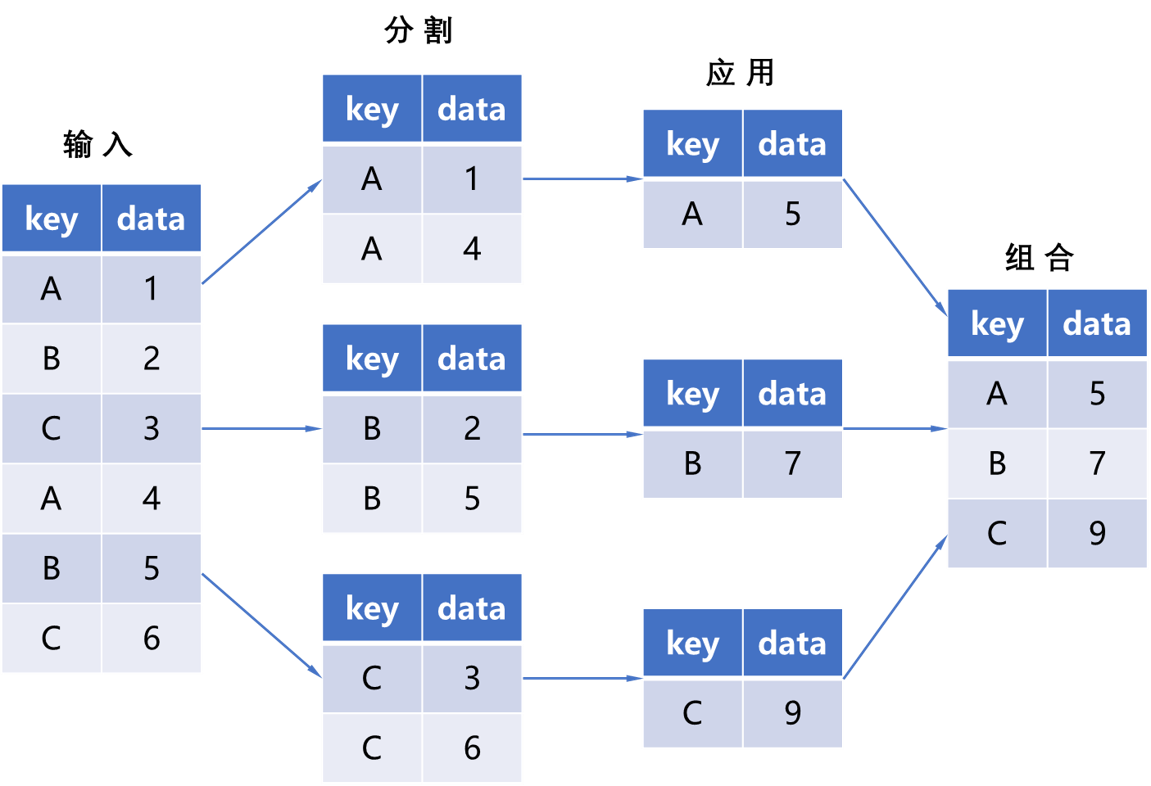

In [33]:
from IPython.display import Image
Image(filename = 'D:/graphs/Python Data Science Handbook/Chapter3/graph3-1.png', width = 540, height = 270)


$$\text{图3-1：groupby操作的可视化过程}$$

虽然我们也可以通过前介绍的一系列的掩码、累计与合并操作来实现，但是意识到中间分割过程不需要显式地暴露出来这一点十分重要。而且GroupBy(经常)只需要一行代码，就可以计算每组的和、均值、计数、最小值以及其他累计值。GroupBy的用处就是将这些步骤进行抽象：用户不需要知道在底层如何计算，只要把操作看成一个整体就够了。   
用Pandas进行图3-1所示的计算作为具体的实例。从创建输入DataFrame开始： 

In [34]:
df = pd.DataFrame({'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data' : range(6)}, columns = ['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


我们可以用DataFrame的groupby()方法进行绝大多数常见的分割-应用-组合操作，将需要分组的列名传进去即可： 

In [35]:
df.groupby('key')

需要注意的是，这里的返回值不是一个DataFrame对象，而是一个DataFrameGroupBy对象。这个对象的魔力在于，你可以将它看成是一个种特殊性形式的DataFrame，里面隐藏着如果组数据，但是在没有应用累计函数之前不会计算。这种"延迟计算"(lazy evalution)的方法使得大多数常见的累计操作 可以通过一种对用户而言几乎是透明(感觉操作仿佛不存在)的方式非常高效地实现。   
为了得到这个结果，可以对DataFrameGroupBy对象应用累计函数，它会完成相应的应用/组合步骤并生成结果：

In [36]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


sum()只是众多可用方法中的一个。你可以用Pandas或NumPy的任意一种累计函数，也可以用任意有效的DataFrame对象。下面就会介绍。
2. GroupBy对象   
GroupBy是一种非常灵活的抽象类型。在大多数场景中，你可以将它看成是DataFrame的集合，在底层解决所有问题。让我们用行星数据将来做一些演示。   
GroupBy中最重要的操作可能就是aggregate、filter、transform和apply(累计、过滤、转换、应用)了，后文将详细介绍这些内容，现在先来介绍一些GroupBy的基本操作方法。   
(1) 按列取值。GroupBy对象与DataFrame一样，也支持按列取值，并返回一个修改过的GroupBy对象，例如： 

In [37]:
planets.groupby('method')

In [38]:
planets.groupby('method')['orbital_period']

这里从原来的DataFrame中去某个列名作为一个Series组，与GroupBy对象一样，直到我们运行累计函数，才会开始计算：   

In [39]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

这样可以获得不同方法下所有行星公转周期(按天计算)的中位数。   
(2) 按组迭代。GroupBy对象支持直接按组进行迭代，返回的每一组都是Series或DataFrame：   

In [40]:
for (method, group) in planets.groupby('method'):
   print('{0:30s} shape = {1}'.format(method, group.shape))

Astrometry                     shape = (2, 6)
Eclipse Timing Variations      shape = (9, 6)
Imaging                        shape = (38, 6)
Microlensing                   shape = (23, 6)
Orbital Brightness Modulation  shape = (3, 6)
Pulsar Timing                  shape = (5, 6)
Pulsation Timing Variations    shape = (1, 6)
Radial Velocity                shape = (553, 6)
Transit                        shape = (397, 6)
Transit Timing Variations      shape = (4, 6)


尽管通常还是使用内置的apply功能速度更快，但这种方式在手动处理某些问题时非常有用，后面会详细介绍。   
(3) 调用方法。借助Python类的魔力(`@`classmethod)，可以让任何不由GroupBy对象直接实现的方法直接应用到每一组，无论是DataFrame还是Series对象都同样适用。例如，你可以用DataFrame的describe()方法进行累计，对每一组数据进行描述性统计：   

In [41]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


这张表可以帮助我们对数据有更深刻的认识，例如大多数行星都是通过Radial Velocity和Transit方法 发现的，而且猴子在近时间变得越来越普遍(得益于更新、更精确的望远镜)。最新的Transit Timing V ariation和Orbital Brightness Modulation方法在2011年之后才有新的发现。   
这只是演示Pandas调用方法的示例之一。方法首先会应用到每组数据上，然后结果由GroupBy组合后返回。另外，任意DataFrame/Series的方法都可以由GroupBy方法调用，从而实现非常灵活强大的操作。
3. 累计、过滤、转换和应用     
虽然前面的章节只重点介绍了组合操作，但是还有许多操作没有介绍，尤其是GroupBy对象的aggregate()、filter()、transform()和apply()方法，在数据组合之前实现了大量高效的操作。   
为了方便后面内容的演示，使用下面这个DataFrame：   

In [42]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1' : range(6),
                   'data2' : rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


(1) 累计。我们目前比较熟悉的GroupBy累计方法只有sum()和median()之类的简单函数，但是aggregate()其实可以支持更复杂的操作。比如字符串、函数或者函数列表，并且能一次性计算所有累计值。下面来快速演示一个例子： 

In [43]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

另一种方法是通过Python字典制定不同列需要累计的函数： 

In [44]:
df.groupby('key').aggregate({'data1' : 'min', 'data2' : 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


(2) 过滤。过滤操作可以让你按照分组的属性丢弃若干数据。例如，我们可能只需要保留标准差超过某个阈值的组： 

In [45]:
def filter_func(x):
   return x['data2'].std() > 4
    
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


filter()函数会返回一个布尔值，表示每个组是否通过过滤。由于A组'data2'列的标准差不大于4，所以被丢弃了。   
(3) 转换。累计操作返回的是对组内全量数据缩减过的结果，而转换操作返回一个新的全量数据。数据经过转换之后，其形状与原来的数计入数据是一样的。长江的例子就是讲每一组的样本数据减去各组的均值，实现数据标准化：   

In [46]:
df.groupby('key').transform(lambda x : x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


(4) apply()方法。apply()方法让你可以在每个组上应用任意方法。这个函数输入一个DataFrame。返回一个Pandas对象(DataFrame或Series)或一个标量(scalar，单个数值)。组合操作会适应返回结果类型。   
下面的例子就是用apply方法将第一列数据以第二列的和为基数进行标准化：

In [47]:
def norm_by_data2(x):
    # x是一个富足数据的DataFrame
    x['data1'] /= x['data2'].sum()
    return x

print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


GroupBy里的apply()非常灵活，唯一需要注意的地方是它总是输入分组数据的DataFrame，返回Pandas对象或标量。具体如何需要视情况而定。   
4. 设置分割的键   
前面的简单例子一直在用列名分割DataFrame。这只是众多分组操作中的一种，下面将继续介绍更多的分组方法。   

(1) 将列表、数组、Series或索引作为分组键。分组键可以是长度与DataFrame匹配的任意Series或列表，例如：

In [48]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


因此，还有一种比前面直接用列名更啰嗦的表示方法df.groupby('key'):

In [49]:
print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


(2) 用字典或Series将索引分组映射到分组名称。另一种方法是提供一个字典，将索引映射到分组键：

In [50]:
df2 = df.set_index('key')
mapping = {'A':'vowel', 'B':'consonant', 'C':'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


(3) 任意Python函数。与前面的字典映射类似，你可以将任意Python函数传入groupby，函数映射到索引，然后新的分组输出：

In [51]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


(4) 多个有效键构成的列表。此外，任意之前有效的键都可以组合起来进行分组，从而返回一个多级索引的分组结果：

In [52]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


5. 分组案例   
通过下例中的几行Pytnon代码，我们就可以运用上述知识，获取不同方法和不同年份发现的行星数量：

In [53]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'

print(planets.groupby(['method', decade])['number'].sum().unstack().fillna(0))

decade                         1980s  1990s  2000s  2010s
method                                                   
Astrometry                       0.0    0.0    0.0    2.0
Eclipse Timing Variations        0.0    0.0    5.0   10.0
Imaging                          0.0    0.0   29.0   21.0
Microlensing                     0.0    0.0   12.0   15.0
Orbital Brightness Modulation    0.0    0.0    0.0    5.0
Pulsar Timing                    0.0    9.0    1.0    1.0
Pulsation Timing Variations      0.0    0.0    1.0    0.0
Radial Velocity                  1.0   52.0  475.0  424.0
Transit                          0.0    0.0   64.0  712.0
Transit Timing Variations        0.0    0.0    0.0    9.0


此例足以展示GroupBy在探索真实数据集时候快速组合多种操作的能力——只用寥寥几行代码，就可以让我们立即对过去几十年里不同年代的行星发现方法有一个大概的了解。   
建议花点时间分析这几行代码，确保自己真正理解了每一行代码对结构产生了怎样的影响。虽然这个例子的确有点儿复杂，但是理解这几行代码的含义可以帮你掌握分析类似数据的方法。   

## 3.10 数据透视表   

我们已经介绍过GroupBy抽象类是如何探索数据集内部的关联性的了。数据透视表(pivot table)是一种类似的 操作方法，常见于Excel与类似的表格应用中。数据透视表将每一列数据作为输入，输出将数据不断细分为多个维度累计信息的二维数据表。人们有时容易混淆数据透视表与GroupBy，但我觉得数据透视表更像是一种多维的GroupBy累计操作。也就是说，虽然你也可以分割-应用-组合，但是分割与组合不是发生在以为索引上，而是在二维网络上(行列同事分组)。   

### 3.10.1 演示数据透视表   

这一节的示例将采用泰坦尼克号的乘客信息数据库来演示，可以在Seaborn程序库(参见4.16节)获取：

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

# titanic = sns.load_dataset('titanic')

titanic = pd.read_csv('D:/Python/data/titanic.csv')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


这份数据包含了惨遭厄运的每位乘客的大量信息，包括性别(gender)、年龄(age)、船舱等级(class)和船票价格(fare paid)等。   

### 3.10.2 手工制作数据透视表    

在研究这些数据之前，先将它们按照性别、最终生还状态或其他组合属性进行分组。如果你看过前面的章节，你可能会用GroupBy来实现，例如这样统计不同性别乘客的生还率：   

In [60]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


这组数据会立即给我们一个直观感受：总体来说，有四分之三等等女性被救，但只有五分之一的男性被救！   
这组数据很有用，但是我们可能还想进一步探索，同时观察不同性别与船舱等级的生还情况。根据GroupBy的操作流程，我们也许能够实现想要的结果：将船舱等级('class')与性别('sex')分组，然后选择生还状态('survived')列，应用均值('mean')累计函数，再将各组结果组合，最后通过行索引操作将最里层的行索引转换成列索引，形成二维数组。代码如下所示：

In [61]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


与GroupBy方法相比，这行代码可读性更强，而且取得的结果也一样。可能与你对20世纪初的那场灾难的想象一致，生还率最高的是船舱等级高的女性(露丝自然得救)。一等舱的女性乘客基本全部生还，而二等舱男性乘客的生还率仅为十分之一(杰克为爱牺牲)。   

1. 多级数据透视表   
与GroupBy类似，数据透视表中的分组也可以通过各种参数指定多个等级。例如，我们可能想把年龄('age')也加进去作为第三个维度，这就可以通过pd.cut函数将年龄进行分段： 

In [62]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

对某一列也可以使用同样的策略——让我们用pd.qcut将船票价格按照计数项等分为两份，加入数据透视表看看：   

In [63]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

结果是一个带层级索引(见3.6节)的四维累计数据表，通过网格显示不同数值之间的相关性。
2. 其他数据透视表选项    
DataFrame的pivot_table方法的完整前面如下所示：

我们已经介绍过签名三个参数了，现在来看看其他参数。fill_value和dropna这两个参数用于处理缺失值，用法很简单，我们将在后面的示例中演示其用法。   
aggfunc参数用于设置累计函数类型，默认值是均值(mean)。与GroupBy的用法一样，累计函数可以用一些常见的字符串('sum'、'mean'、'count'、'min'、'max'等)表示，也可以用标准的累计函数(np.sum()、min()、sum())表示。另外，还可以通过字典为不同的列指定不同的累计函数：   

In [67]:
titanic.pivot_table(index = 'sex', columns = 'class',
                          aggfunc = {'survived' : sum, 'fare' : 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

需要注意的是，这里忽略了一个参数values。当我们为aggfunc指定映射关系的时候，待透视的数值就已经确定了。   
当需要计算每一组的总数时，可以通过margins参数来设置：  

In [68]:
titanic.pivot_table('survived', index = 'sex', columns = 'class', margins = True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


这样就可以自动获取不同性别下船舱等级与生还率的相关信息、不同船舱等级下性别与生还率的相关信息，以及全部乘客的生还率为38%。margin的标签可以通过margins_name参数进行自定义，默认值为"All"。   

### 3.10.4 案例：美国人的生日   

再来看一个有趣的而梨子——由美国疾病防治中心(Centers for Disease Control，CDC)提供的公开生日数据， 这些数据可以从<https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv>下载。(Andrew Gelman和他的团队已经对这个数据集进行了深入的分析，详情请参见博文<http:bit.ly/2fZzW8K>。)

In [69]:
# shell下载数据
# !curl -0 https://raw.githubusercontent.com/jakevdp/data.CDCbirths/master/births.csv

In [70]:
births = pd.read_csv('D:/Python/Python Project/Python_Data_Science_Handbook-master/data/births.csv')

只简单浏览一下，就会发现这些数据比较简单，只包含了不同出生日期(年月日)与性别的出生人数： 

In [71]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


可以用一个数据透视表来探索这份数据。先增加一列表示不同年代，看看各年代的男女出生比例：

In [72]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


我们马上就会发现，每个年代的男性出生率都比女性出生率高。如果希望更直观地体现这种趋势，可以用Pandas内置的画图功能将每一年的出生人数画出来(如图3-2所示，详情请参见第4章用Matplotlib画图的内容)：

NameError: name 'plt' is not defined

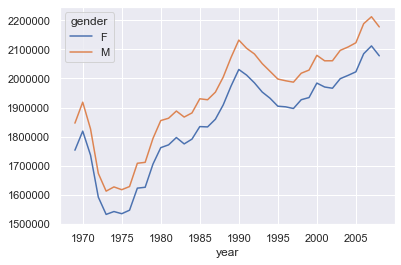

In [73]:
%matplotlib inline

sns.set()  # 使用Seaborn风格
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('total births per year')

$$\text{图3-2：各年不同性别出生人数分布图}$$

借助一个简单的数据透视表和plot()方法，我们马上就可以发现不同性别出生率的趋势。通过肉眼观察，得知过去50年间的男性出生率比女性出生率高5%。   

**深入探索**   
虽然使用数据透视表并不是必须的，但是通过Pandas的这个工具可以展示一些有趣的特征。我们必须对数据做一点儿清理工作，消除由于输错了日期造成的异常点(如6月31日)或者是缺失值(如1999年6月)。消除这些异常的简便方法就是直接删除异常值，可以通过更稳定的sigma消除法(sigma-clipping，按照正泰分布标准差划定范围，SciPy中默认是四个标准差)操作来实现：

In [74]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

最后一行是样本均值的稳定性估计(robust estimate)，其中0.74是指标准正态分布的分位数间距。在query() 方法(详情请见3.13节)中用这个范围就可以将有效的生日数据筛选出来了： 

In [75]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

然后，将day列设置为整数，这列数据在筛选之前是字符串，因为数据集中有的列含有缺失值'null'：

In [76]:
# 将'day'列设置为整数。由于其中包含缺失值null，因此是字符串
births['day'] = births['day'].astype(int)

现在就可以将年月日组合起来创建一个日期索引了(参见3.12节)，这样就可以快速计算每一行是星期几：

In [78]:
# 从年月日创建一个日期索引：
births.index = pd.to_datetime(10000 * births.year + 100 * births.month 
                              + births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

用这个索引可以画出不同年代不同星期的日均出生数据(如图3-3所示)：

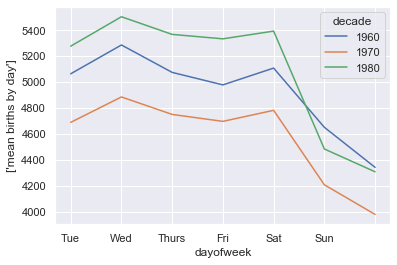

In [80]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index = 'dayofweek',
                   columns = 'decade', aggfunc = 'mean').plot()
                   
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel(['mean births by day']);

$$\text{图3-3：不同年代不同星期的日均出生数据}$$

由图可知，周末的出生人数比工作日要低很多。另外，因为CDC只提供了1989年之前的数据，所以没有20世纪90年代和21世纪的数据。   
另一个有趣的图标是画出哥哥年份评价每天的出生人数，可以按照月和日两个维度分别对数据进行分组：

In [81]:
births_by_date = births.pivot_table('births',
                                   [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

这是一个包含月和日的多级索引。为了让数据可以用图形表示，我们可以虚构一个年份与月和日组合成新索引(注意日期为2月29日时，索引年份需要用闰年，丽日2012)：

In [82]:
import datetime 

births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]
births_by_date.head()

C:\Users\dowjohn\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


如果只关心月和日的话，这就是一个可以反映一年中平均每天出生人数的时间序列。可以用plot方法将数据画成图(如图3-4所示)，从图中可以看到一些有趣的趋势：

Text(0.5, 1.0, '图3-4：平均每天的出生人数')

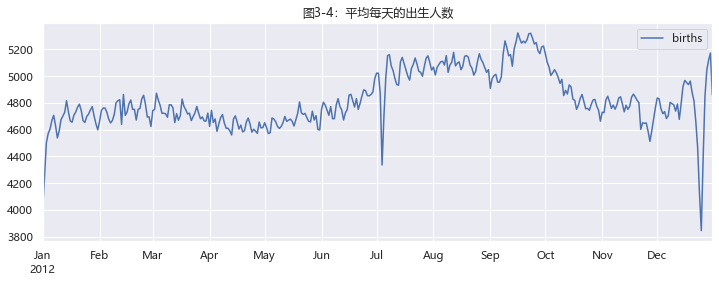

In [84]:
# 将结果画成图
plt.rcParams['font.sans-serif'] = ['MicroSoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)
plt.title('图3-4：平均每天的出生人数')

从图中可以明显看出，在美国节假日的时候，出生人数急速下降(例如美国独立日、劳动节、感恩节、圣诞节以及新年)。这种现象可能是因为医院放假导致的接生减少(自己在家生)，而非自然生育的心理学效应。关于这个趋势的更详细介绍，请参考Andrew Gelman的博客(<http://bit.ly/2fZzW8K>)。我们将在4.11.1节再次使用这张图，那时将红Matplotlib的画图工具为这张图增加标注。   
通过这个简单的案例，你会发现学过的前面介绍过的Python和Pandas工具可以相互结合，并用于从大量数据集中获取的信息。我们将在后面的章节中介绍如何用这些工具创建更复杂的应用。

## 3.11 向量化字符串操作

使用Python的一个优势就是字符串处理起来比较容易。在此基础上创建的Pandas同样提供了一系列向量化字符串操作(vectorized operation)，它们都是在处理(清洗)显示工作中的数据时不可获取的功能。在这一节中，我们将介绍Pandas的字符串操作，学习如何用它们对一个从网络采集来的杂乱无章的数据集进行局部清理。

###  3.11.1 Pandas字符串操作简介

前面的章节已经介绍过如何使用NumPy和Pandas进行一般的运算操作，因此我们也能简便快速地对多个数组元素执行同样的操作，例如：

In [85]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

向量化操作简化了纯数值操作语法——我们不需要再担心数组的长度或维度，只需要关心需要的操作。然而，由于NumPy并没有为字符串数组提供简单的接口，因此需要通过繁琐的for循环来解决问题：

In [86]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

虽然这么做对于某些数据可能是有效的，但是假如数据中出现了缺失值，那么这样做就会引起异常，例如：   

In [87]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas为包含字符串的Series和Index对象提供的str属性堪称两全其美的方法，它既可以满足向量化字符串操作的需求，又可以正确地处理缺失值。例如，我们用前面的数据data创建了一个Pandas的Series：

In [88]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

现在可以直接调用转换大写capitalize()将所有的字符串变成大写形式，缺失值会被跳过：

In [89]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

在str属性后面用Tab建，可以看到Pandas支持的所有向量化字符串方法。

### 3.11.2 Pandas字符串方法列表

如果你熟悉Pytnon的字符串方法的话，就会发现Pandas绝大多数的字符串语法都很直观，甚至可以列成一个表格，在深入论述后面的内容之前，让我们从这一步开始。这一节的示例将采用一些人名来演示：

In [90]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 
                  'Eric Idle', 'Terry Jones', 'Michael Palin'])

1. 与Python字符串方法相似的方法   
几乎所有Python内置的字符串方法都被复制到Pandas的向量化字符串方法中。下面的表格列举了Pandas的str方法借鉴Pytnon字符串方法的内容：   
len() $\quad$  lower() $\quad$ translate() $\quad$ islower()   
ljust() $\quad$ upper() $\quad$ startswith() $\quad$ isnumeric()   
rjust() $\quad$ find() $\quad$ endswith() $\quad$ isnumeric()   
center() $\quad$ rfind() $\quad$ isalnum() $\quad$ isdecimal()   
zfill() $\quad$ index() $\quad$ isalpha() $\quad$ split()   
strip() $\quad$ rindex() $\quad$ isdigit() $\quad$ rsplit()   
rstrip() $\quad$ capitalize() $\quad$ isspace() $\quad$ partition()   
lstrip() $\quad$ swapcase() $\quad$ istitle() $\quad$ rpartition()   
需要注意的是，这些方法的返回值不同，例如lower()方法返回一个字符串Series：

In [91]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

但是有些方法返回数值：

In [92]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

有些方法返回布尔值：

In [93]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

有些方法返回列表或其他复合值：

In [94]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

在接下来的内容中，我们将进一步学习这类有列表元素构成的Series(series-of-lists)对象。   
2. 使用正则表达式的方法   
还有一些支持正则表达式的方法可以用来处理每个字符串元素。表3-4中的内容是Pandas向量化字符串方法根据Python标准库的re模块函数实现的API。   
$$
\text{表3-4：Pandas向量化字符串方法与Python标准库的re模块函数的对应关系} \\
\begin{array}{l|l} 
\hline
\text{方法} & \text{描述} \\
\hline
match() & \text{对每个元素调用re.match()，返回布尔类型值} \\
extract() & \text{对每个元素调用re.match()，返回匹配的字符串组(groups)} \\
findall() & \text{对每个元素调用re.findall()} \\
replace() & \text{用正则表达式替代字符串} \\ 
contains() & \text{对每个元素调用re.search()，返回布尔类型值} \\
count() & \text{计算符合正则模式的字符串的数量} \\
split() & \text{等价于str.split()，支持正则表达式} \\
rsplit() & \text{等价于str.rsplit()，支持正则表达式} \\
\hline
\end{array}
$$
通过这些方法，你就可以实现各种有趣的操作了。例如，可以提取元素前面的连续字母作为每个人的名字(first name)

我们还能实现更复杂的操作，例如找出所有开头和结尾都是辅音字母的名字——这可以用正则表达式中的开始符号(`^`)和结尾符号(`$`)来实现：

In [95]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

能将正则表达式应用到Series与DataFrame之中的话，就有可能实现更多的数据分析与清洗方法。

3. 其他字符串方法   
还有其他一些方法也可以实现方便的操作(如表3-5所示)。
$$
\text{表3-5：其他Pandas字符串方法} \\
\begin{array}{l|l} 
\hline
\text{方法} & \text{描述} \\
\hline
get() & \text{获取元素索引位置上的值，索引从0开始} \\
slice() & \text{对元素进行切片取值} \\
slice_replace() & \text{对元素进行切片替换} \\
cat() & \text{连接字符串()此功能比较复杂，建议阅读文档} \\ 
repeat() & \text{重复元素} \\
normalize() & \text{将字符串转换为Unicode规范形式} \\
pad() & \text{在字符串的左边、右边或两边增加空格} \\
wrap() & \text{将字符串按照指定的宽度换行} \\
join() & \text{用分隔符连接Series的每个元素} \\
get\_dummies() & \text{按照分隔符提取每个元素的dummy变量，转换为独热(one-hot)编码的DataFrame} \\
\hline
\end{array}
$$

(1) 向量化字符串的取值与切片操作。这里需要特别指出的是，get()与slice()操作可以从每个字符串数组中获取向量化元素。例如，我们可以通过str.slice(0,\,3)获取每个字符串数组的前三个字符。通过Python的标准取值方法也可以取得同样的效果，例如df.str.slice(0,\,3)等价于df.str[0:3]：

In [96]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

df.str.get(i)与df.str[i]的按索引取值效果类似。   
get()与slice()操作还可以在split()操作之后使用。例如，要获取每个姓名的姓(last name)，可以结合使用split()与get()：

In [97]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

(2) 指标变量。另一个需要多花点时间解释的是get_dummies()方法。当你的数据有一列包含了若干已被编码的指标(coded indicator)时，这个方法就能派上用场了。例如，假设有一个包含了某种编码信息的数据集，如A=出生在美国、B=出生在英国、C=喜欢奶酪、D=喜欢午餐肉：

In [98]:
full_monte = pd.DataFrame({'name':monte,
                           'info':['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


get_dummies()方法可以让你快速将这些指标变量分割成一个独热编码的DataFrame(每个元素都是0或1)：

In [99]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


通过Pandas自带的这些字符串操作方法，你就可以建立一个功能无比强大的字符串处理程序来清洗自己的数据了。   
虽然本书将不再继续介绍这些方法，但是希望你仔细阅读Pandas在线文档中"Working with Text Data"(<http://pandas.pydata.org/pandas-docs/stable/text.html>)节，或者阅读3.14节的相关资源。

### 3.11.3 案例：食谱数据库   

前面介绍的这些向量化字符串操作方法非常适合用来处理现实中哪些凌乱的数据。下面将通过一个从不同网站获取的公开食谱数据库的案例来进行演示。我们的目标是将这些食谱数据解析为食材列表，这样就可以根据现有的食材快速找到食谱。   
获取数据的脚本可以在（<https://github.com/fictivekin/openrecipes>)上找到，那里还有最新版本的数据库链接。   
截止2016年春，这个数据集以及有了30MB了。可以通过下面的命令下载并解压数据：

In [2]:
#!curl -0 https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz
#!gunzip recipeitems-latest.json.gz

这个数据库是JSON格式的，来试试通过pd.read_json读取数据：

In [25]:
import pandas as pd

try:
    recipes = pd.read_json('D:\\Python\\Python Project\\Python_Data_Science_Handbook-master\\data\\recipeitems-latest.json')
    #recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print('ValueError:', e)

ValueError: Trailing data


我们得到的竟然是提示数据里有"trailing data"(数据断行)的ValueError错误。从网上搜索这个错误，得知原因好像是虽然文件中每一行都是一个有效的JSON对象，但是全文却不是这样。来看看文件是不是这样：

In [5]:
with open('D:\\Python\\Python Project\\Python_Data_Science_Handbook-master\\data\\recipeitems-latest.json', 'r') as f:
    line = f.readline()
    print(pd.read_json(line).shape)

(2, 12)


显然每一行都是一个有效的JSON对象，因此需要将这些字符串连接在一起。解决这个问题的一种方法就是新建一个字符串，将所有行JSON对象连接起来，然后在通过pd.read_json来读取所有数据：

In [38]:
# 将文件内容读取哼Python数组
with open('D:\\Python\\Python Project\\Python_Data_Science_Handbook-master\\data\\recipeitems-latest.json', 'r', encoding = 'UTF-8') as f:
    # 提取每一行内容
    data = (line_1.strip() for line_1 in f) 
    # 将所有内容合并成一个列表
    data_json = '[{0}]'.format(','.join(data))
# 用JSON形式读取数据
recipes = pd.read_json(data_json)

recipes.to_csv('D:\\Python\\Python Project\\Python_Data_Science_Handbook-master\\data\\recipeitems-latest.csv')

In [29]:
recipes.shape

(173278, 17)

这样就会看到近20万份食谱，共17列。抽一行看看具体内容：

In [30]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

这里有一段信息，而且其中有不少都和从网站上抓取的数据一样，字段形式混乱。值得注意的是，食材列表是字符串形式，我们需要从中抽取感兴趣的信息。下面来仔细看看这个字段：

In [31]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

食材列表平均415个字符，最短的字符串是315个字符，最长的516个字符。   
出于好奇心，来看看这个拥有最长食材列表的究竟是哪道菜：

In [32]:
import numpy as np

recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

我们还可以再做一些累计探索，例如看看哪些食谱是早餐：

In [33]:
recipes.description.str.contains('[Bb]iscuits').sum()

841

或者看看有多少食谱用肉桂(cinnmon)作为食材：

In [34]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [35]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

这些基本的数据探索都可以用Pandas的字符串工具来处理，Python非常适合进行类似的数据清理工作。   
1. 制作简易的美食推荐系统        
现在让我们更进一步，来制作一个简易的美食推荐系统：如果yoghurt提供一些食材，系统就会推荐使用所有食材的食谱。这说起来容易，但是由于大量不规则(heterogeneity)数据的存在，这个任务变得十分复杂，例如并没有一个简单直接的办法可以从每一行数据中清理出一份感觉的食材列表。因此，我们在这里简化处理：首先提供一些常见食材列表，然后通过简单搜索判断这些食材是否在食谱中。为了简化任务，这里只列举常用的香料和调味料：

In [36]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
             'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

现在就可以通过一个由True与False构成的布尔类型的DataFrame来判断食材是否出现在某个食谱中：

In [37]:
import re 
spice_df = pd.DataFrame(
                        dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                              for spice in spice_list))
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


现在，来找一份使用了欧芹(parsley)、辣椒粉(paprika)和龙蒿叶(tarragon)这三种食材的食谱。我们可以通过3.13节介绍的DataFrame的query()方法来快速完成计算：

In [38]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

最后只找到十份同时包含这三种食材的食谱，让我们用索引看看究竟是哪些食谱：

In [39]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

现在已经将搜索范围缩小到原来近两万份食谱的两千分之一了，这样说就可以从这个小集合中精细挑选出中意的食谱。
2. 继续完善美食推荐系统   
希望这个示例能让你对Pandas字符串方法可以高效解决哪些数据清洗问题有个初步概念。当然，如果要建立一个稳定的美食推荐系统，还需要做大量的工作！从每个食谱中提取完整的食材列表是这个任务的重中之重。不过，由于食材的书写格式千奇百怪了，解析它们需要耗费大量时间。其实也揭示了数据科学的真相——真是数据的清洗与整理工作往往会占据大部分的时间，而使用Pandas提供的工具可以提高你的工作效率。   

## 3.12 处理时间序列   

由于Pandas最初是为金融模型而创建的，因此它拥有一些功能非常强大的日期、时间、带时间索引数据的处理工具。本节将介绍的日期与时间数据主要包含三类。   

* 时间戳表示某个具体的时间点(例如2015年7月4日上午7点)。
* 时间间隔与周期表示开始时间点与结束时间点之间的时间长度，例如2015年(指的是2015年1月1日至2015年12月31日这段时间间隔)。周期通常是指一种连续形式的时间间隔，每个间隔长度相同，彼此之间不会重叠(例如，以24小时为周期构成每一天)。
* 时间增量(time delta)或持续时间(duration)表示精确的时间长度(例如，够程序运行持续时间22.56秒)。   

在本节内容中，我们将介绍Pandas中的3种日期、时间数据类型的具体用法。由于篇幅有限，后文无法对Python和Pandas的时间序列工具进行详细的介绍，仅仅通过一个宽泛的综述，总结何时应该使用它们。在介绍Pandas的时间序列工具之前，我们先简单介绍一下Python处理日期与时间数据的工具。在介绍完一些值得深入学习的资源之后，再通过一些剪短的示例来演示Pandas处理时间序列数据的方法。   

### 3.12.1 Python的日期与时间工具    

在标准Python标准库与第三方库中有许多可以表示日期、时间、时间增量和时间跨度(timespan)的工具。尽管Pandas提供的时间序列工具更适合用来处理数据科学问题，但是了解Pandas与Python标准库以及第三方库中的其他时间序列工具之间的关联性将大有裨益。   
1. 原生Python的日期与时间工具：datatime与dateutil   
Python基本的日期与时间功能都在标准库的datetime模块中。如果和第三方库deteutil模块搭配使用，可以快速实现许多处理日期与时间的功能。例如，你可以用datetime类型创建一个日期：

In [40]:
from datetime import datetime
datetime(year = 2015, month = 7, day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

或者使用dateutil模块对各种字符串格式的日期进行正确解析：

In [49]:
from dateutil import parser
date = parser.parse('4th of July, 2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

一旦有了datetime对象，就可以进行许多操作，例如打印出这一天是星期几：

In [50]:
date.strftime('%A')

'Saturday'

在最后一行代码中，为了打印出是星期几，我们使用了一个标准字符串格式(standard string format)代码"%A"，你可以在Python的datetime文档(<https://docs.python.org/3/library/datetime.html>)的"strftime"节(<https://docs.python.org/3/library/datetime.html#strftim-and-strptime-behavior>)查看具体信息。关于dateutil的其他日期功能可以通过dateutil的在线文档(<http://labix.org/python-dateutil>)学习。还有一个值得关注的程序包时pytz(<http://pytz.sourceforge.net/>)，这个工具解决了绝大多数时间序列数据都会遇到的难题：时区。   
datetime和dateutil模块在灵活性与易用性方面都表现出色，你可以用这些对象及其相应的方法请速冻完成你感兴趣的任何操作。但如果你处理的时间数据量比较大，那么速度就会比较慢。就像之前介绍过的Python的原生列表对象没有NumPy中已经被编码的数值类型数组的性能好一样，Python的原生日期对象同样也没有NumPy中已经被编码的日期(encoded dates)类型数组的性能好。   
2. 时间类型数组：NumPy的datetime64类型   
Python原生日期格式的性能弱点促使NumPy团队为NumPy增加了自己的时间序列类型。datetime64类型将日期编码为64位整数，这样可以让日期数组非常紧凑(节省内存)。datetime64需要在设置日期时确定具体的输入类型：

In [51]:
import numpy as np
date = np.array('2015-07-04', dtype = np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

只要有了这个日期格式，就可以进行快速的向量化运算：

In [53]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

因为NumPy的datetime64数组内元素的类型是统一的，所以这种数组的运算速度会比Python的datetime对象运算速度快很多。尤其是在处理较大数组时(关于向量化运算的内容已经在2.3节介绍过)。   
datetime64与timedelta64对象的一个共同特点是，它们都是在基本时间单位(fundamental time unit)的基础上建立的。由于datetime64对象是64位精度，所以可编码的时间可以是基本单位的$2^{64}$倍。也就是说，tatetime64在时间精度(time resolution)与最大时间跨度(maximum time span)之间达成了一种平衡。   
比如你想要一个时间纳秒(nanosecond, ns)级的时间精度，纳秒你就可以将时间编码到$0\sim 2^{64}$倍或600年之内，NumPy会自动判断输入时间需要使用的时间单位。例如，下面一个以天为单位的日期：

In [54]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

而这是一个已分钟为单位的日期：

In [55]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

需要注意的是，时区将自动设置为执行代码的操作系统的当地时区。你可以通过各种格式的代码设置基本时间单位。例如，将时间单位设置为纳秒：

In [56]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

NumPy的datetime64文档(<http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html>)总结了所有支持相对于绝对时间跨度的时间与日期单位格式，表3-6对此总结如下。   
$$\text{表3-6：日期与时间单位格式代码}$$
$$
\begin{array}{l|l|l|l}
\hline
\text{代码} & \text{含义} & \text{时间跨度(相对)} & \text{时间跨度()绝对}   \\
\hline
\text{Y} & \text{年(year)} & \text{$\pm$ 9.2e18年} & \text{[2.9e18 BC, 2.9e18 AD]}   \\
\text{M} & \text{月(month)} & \text{$\pm$ 7.61e17年} & \text{[7.6e17 BC, 7.6e17 AD]}   \\
\text{W} & \text{周(week)} & \text{$\pm$ 1.7e17年} & \text{[1.7e17 BC, 1.7e17 AD]}   \\
\text{D} & \text{日(day)} & \text{$\pm$ 2.5e16年} & \text{[2.5e16 BC, 2.5e16 AD]}   \\
\text{h} & \text{时(hour)} & \text{$\pm$ 1.0e15年} & \text{[1.5e15 BC, 1.0e15 AD]}   \\
\text{m} & \text{分(minute)} & \text{$\pm$ 1.7e13年} & \text{[1.7e13 BC, 1.7e13 AD]}   \\
\text{s} & \text{秒(second)} & \text{$\pm$ 2.9e12年} & \text{[2.9e9 BC, 2.9e9 AD]}   \\
\text{ms} & \text{毫秒(millisecond)} & \text{$\pm$ 2.9e9年} & \text{[2.9e6 BC, 2.9e6 AD]}   \\
\text{us} & \text{微秒(microsecond)} & \text{$\pm$ 2.9e6年} & \text{[290301e6 BC, 294241e6 AD]}   \\
\text{ns} & \text{纳秒(nanosecond)} & \text{$\pm$ 292年} & \text{[1678 AD, 2262 AD]}   \\
\text{ps} & \text{皮秒(picosecond)} & \text{$\pm$ 106天} & \text{[1969 AD, 1970 AD]}   \\
\text{fs} & \text{飞秒(nanosecond)} & \text{$\pm$ 2.6小时} & \text{[1969 AD, 1970 AD]}   \\
\text{as} & \text{飞秒(attosecond)} & \text{$\pm$ 9.2秒} & \text{[1969 AD, 1970 AD]}   \\
\hline
\end{array}
$$
对于日常工作中的时间数据类型，默认单位都用纳秒datetime64[ns]，因为用它来表示时间范围精度可以满足绝大部分需求。   
最后还需要说明一点，虽然datetime64弥补了Python原生的datetime类型的不足，但它缺少了许多datetime(尤其是dateutil)原本具备的便捷方法与函数，具体内容请参考NumPy的detetime64文档(<http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html>)。
3. Pandas的日期与时间工具：理想与现实的最佳解决方案   
Pandas所有关于日期与时间的处理方法全部都是通过Timestamp对象实现的，它利用numpy.datetime64的有效存储和向量化接口将datetime和dateutil的易用性有机结合起来。Pandas通过一组Timestamp对象就可以创建一个座位Series或DataFrame索引的DatetimeIndex，我们将在后面介绍很多类似的例子。   
例如，可以用Pandas的方式演示前面介绍的日期与时间功能。我们可以灵活处理不同格式的日期与时间字符串，获取某一天是星期几：

In [57]:
import pandas as pd
date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [58]:
date.strftime('%A')

'Saturday'

另外，也可以直接进行NumPy类型的向量化运算：

In [59]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

下面详细介绍Pandas用来处理时间序列数据的工具。   

### 3.12.2 Pandas时间序列：用时间做索引   

Pandas时间序列工具非常适合用来处理带时间戳的索引数据。例如，我们可以通过一个时间索引数据创建一个Series对象：

In [61]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                         '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index = index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

有了一个带时间索引的Series后，就能用它来演示之前介绍过的Series取值方法，可以直接用日期进行切片取值：

In [62]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

另外，还有一些仅在此类Series上可用的取值操作，例如直接通过年份切片获得该年的数据：

In [63]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

下面将介绍一些示例，体现将日期作为索引为运算带来的便利性。在此之前，让我们看看现有的时间序列数据结构。   

### 3.12.3 Pandas时间序列数据结构    

本节将介绍Pandas用来处理时间序列的基础数据类型。   

* 针对时间戳数据，Pandas提供了Timestamp类型。与前面介绍的一样，它们本质上是Python的原生datetime类型的替代品，但是在性能更好的numpy.datetime64类型的基础上创建。对应的索引数据结构是DatetimeIndex。
* 针对时间周期数据，Pandas提供了Period类型。这是利用numpy.datetime64类型的固定频率的时间间隔进行编码。对应的索引数据结构是PeriodIndex。
* 针对时间增量或持续时间，Pandas提供了Timedelta类型。Timedelta是一种代替Python原生datetime.timedelta类型的高性能数据结构，同样是基于numpy.timedelta64类型，对应的索引结构是TimedeltaIndex。   

最基本的日期、时间对象是Timestamp和DatetimeIndex。这两种对象可以直接使用，最常用的方法是pd.to_datetime()函数，它可以解析许多日期与时间格式。对pd.to_datetime()传递一个日期会返回一个Timestamp类型，传递一个时间序列会返回一个DatetimeIndex类型：

In [64]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])

In [65]:
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

当用一个日期减去另一个日期时，返回的结果是TimedeltaIndex类型：

In [66]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

**有规律的时间序列：pd.date_range()**   
为了能更简便地创建有规律的时间序列。Pandas提供了一些方法：pd.date_range()可以处理时间戳、pd.period_range()可以处理周期、pd.timedelta_range()可以处理时间间隔。我们前面介绍过，Python的range()和NumPy的pd.arange()可以用起点、终点和步长(可选的)创建一个序列。pd.date_range()与之类似，通过开始日期、结束日期和频率代码(同样是可选的)创建一个有规律的日期序列，默认的频率是天：

In [67]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

此外，日期范围不一定非是开始时间与结束时间，也可以是开始时间与周期数periods：

In [69]:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

你可以通过freq参数改变时间间隔，默认值是D。例如，可以创建一个按小时变化的时间戳：

In [70]:
pd.date_range('2015-07-03', periods = 8, freq = 'H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

如果要创建一个有规律的周期或时间间隔序列，有类似的函数pd.period_range()和pd.timedelta_range()。下面是一个以月为周期的示例：

In [71]:
pd.period_range('2015-07', periods = 8, freq = 'M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

以及一个以小时递增的序列：

In [72]:
pd.timedelta_range(0, periods = 10, freq = 'H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

掌握Pandas代码时使用所有这些时间序列创建方法的必要条件。接下来，我们将总结这些代码。   

### 3.12.4 时间频率与偏移量    

Pandas时间序列工具的基础是时间频率或偏移量(offset)代码。就像之前见过的D(day)和H(hour)代码，我们可以用这些代码设置任意需要的时间间隔。表3-7总结了主要的频率代码。   
$$
\text{表3-7：Pandas频率代码}  \\
\begin{array}{l|l|l|l}
\hline
\text{代码} & \text{描述} & \text{代码} & \text{描述}  \\
\hline
\text{D} & \text{天(calendar day, 按日历算，含双休日)} & \text{B} & \text{天(business day, 仅含工作日)}  \\
\text{W} & \text{周(weekly)}  \\
\text{M} & \text{月末(month end)} & \text{BM} & \text{月末(business month day, 仅含工作日)}  \\
\text{Q} & \text{季末(quarter end)} & \text{BQ} & \text{季末(business quarter day, 仅含工作日)}  \\
\text{A} & \text{年末(year end)} & \text{BA} & \text{年末(business year day, 仅含工作日)}  \\
\text{H} & \text{小时(hour)} & \text{BH} & \text{小时(business hours, 工作时间)}  \\
\text{T} & \text{分钟(minutes)} \\
\text{S} & \text{秒(seconds)}   \\
\text{L} & \text{毫秒(milliseconds)}   \\
\text{U} & \text{微秒(microseconds)}   \\
\text{N} & \text{纳秒(nanoseconds)}   \\
\hline
\end{array}
$$

月、季、年频率都是具体周期的结束时间(月末、季末、年末)，而有一些以S(start，开始)为后缀的代码表示日期开始(如表3-8所示)。   
$$
\text{表3-8：带开始索引的频率代码}   \\
\begin{array}{l|l}
\hline
\text{代码} & \text{描述}  \\
\hline
\text{MS} & \text{月初(month start)}  \\
\text{BMS} & \text{月初(business month start，仅含工作日)}  \\
\text{QS} & \text{季初(quarter start)}  \\
\text{BQS} & \text{季初(business quarter start，仅含工作日)}  \\
\text{AS} & \text{年初(year start)}  \\
\text{BAS} & \text{年初(business year start，仅含工作日)}  \\
\hline
\end{array}
$$
另外，你可以在频率代码后面加三位月份缩写字母来改变季、年频率的开始时间。   

* Q-JAN、BQ-FEB、QS-MAR、BQS-APR等。
* A-JAN、BA-FEB、AS-MAR、BAS-APR等。   

同理，也可以在后面加三位星期缩写字母来改变一周的开始时间。   

* W-SUN、W-MON、W-TUE、W-WED等。  
在这些代码的基础上，还可以将频率组合起来创建的新的周期。例如，可以用小时(H)和分钟(T)的组合来实现2小时30分钟： 

In [74]:
pd.timedelta_range(0, periods = 9, freq = '2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

所有这些频率代码都对应Pandas时间序列的偏移量，具体内容可以在pd.tseries.offsets模块中找到。例如，可以用下面的方法直接创建一个工作日偏离序列：

In [75]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods = 5, freq = BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

关于时间频率与偏移量的更多内容，请参考Pandas在线文档"Date Offset objects"(<https://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects>)节。

### 3.12.5 重新取样、迁移和窗口   

用日期和时间直观地组织与获取数据是Pandas时间序列工具最重要的功能之一。Pandas不仅支持普通锁索引功能(合并数据时自动索引对齐，直观的数据切片和取值方法等)，还专为时间序列提供了额外的操作。   
下面让我们用一些股票数据来演示这些功能。由于Pandas最初是为金融数据模型服务的，因此可以用它非常方便地获取金融数据。例如，pandas-datareader程序包(可以通过conda install pandas-datareader进行安装）知道如何从一些可用的数据源导入金融数据，包含Yahoo财经、Google财经和其他数据源。下面来导入Google的历史股票价格：

In [32]:
# conda install pandas-datareader
# pip install git+https://github.com/pydata/pandas-datareader.git

In [34]:
import pandas_datareader.data as data
from pandas.util.testing import assert_frame_equal

goog = data.DataReader('GOOG', start = '2004', end = '2016',
                      data_source = 'yahoo')     # 'google'已经废止
goog.head()
# goog.to_csv('D:\\Python\\Python Project\\Python_Data_Science_Handbook-master\\data\\goog.csv', index_label = 'Date')

出于简化的目的，这里只用收盘价：

In [21]:
goog = goog['Close']

设置Matplotlib之后，就可以通过plot()画出可视化图了(如图3-5所示)：

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

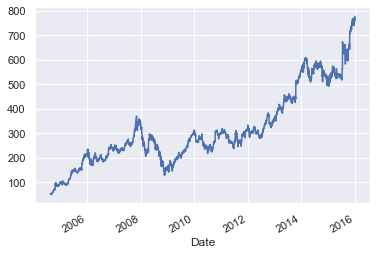

In [23]:
goog.plot()

$$\text{图3-5：Google收盘价随时间变化的趋势}$$

1. 重新取样与频率转换   
处理时间序列数据时，经常需要按照新的频率(更高频率、更低频率)对数据进行取样。你可以通过resample()方法解决这个问题，或者更简单的asfreq()方法。这两个方法的主要差异在于，resample()方法是以数据累计(data aggregation)为基础，而asfreq()方法是以数据选择(data selection)为基础。   
看到Google的收盘价之后，让我们用两种方法对数据进行向后取样(down-sample)。这里用年末('BA'，最后一个工作日)对数据进行重新取样(如图3-6所示)：

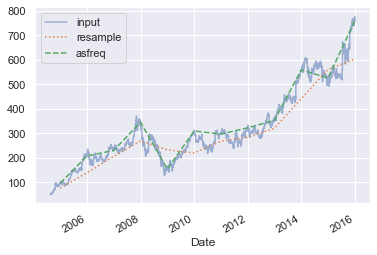

In [24]:
goog.plot(alpha = 0.5, style = '-')
goog.resample('BA').mean().plot(style = ':')
goog.asfreq('BA').plot(style = '--')
plt.legend(['input', 'resample', 'asfreq'],
          loc = 'upper left')

$$\text{图3-6：对Google股票收盘价进行重新取样}$$

请注意这两种取样方法的差异：在每个数据点上，resample反映的是上一年均值，而asfreq反映的是上一年最后一个工作日的收盘价。   
在继续向前取样(up-sampling)时，resample()与asfreq()的用法大体相同，不过重新取样有许多配置方式。操作时，两种方法都默认将向前取样作为缺失值处理，也就是说在里面填充NaN。与前面介绍过的pd.fillna()函数类似，asfreq()有一个method参数可以设置填充缺失值的方式。下面将对工作日数据按天进行重新取样(即包含周末)，结果如图3-7所示：

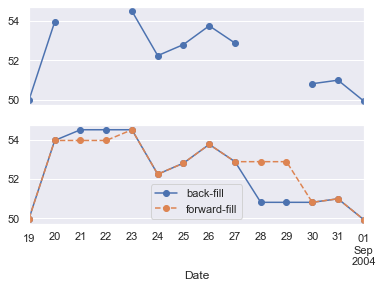

In [26]:
fig, ax = plt.subplots(2, sharex = True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax = ax[0], marker = 'o')

data.asfreq('D', method = 'bfill').plot(ax = ax[1], style = '-o')
data.asfreq('D', method = 'ffill').plot(ax = ax[1], style = '--o')
ax[1].legend(['back-fill', 'forward-fill'])

$$\text{}图3-7：asfreq()向前填充与向后填充值得结果对比$$

上面那幅图是原始数据：非工作日的股价是缺失值，所以不会出现在图上。而下面那幅图通过向前填充与向后填充这两种方法填补了缺失值。 
2. 时间迁移   
另一种常用的时间序列操作时对数据按时间进行迁移。Pandas有两种解决这类问题的方法：shift()和tshift()。简单来说，shift()就是迁移数据，而tshift()就是迁移索引。两种方法都是按照频率代码进行迁移。   
下面我们将用shift()和tshift这两种方法让数据迁移900天(如图3-8所示)：

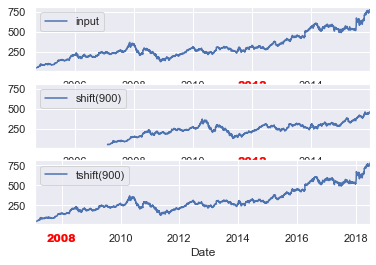

In [30]:
import pandas as pd

fig, ax = plt.subplots(3, sharey = True)

# 对数据应用时间频率，用向后填充解决缺失值
goog = goog.asfreq('D', method = 'pad')

goog.plot(ax = ax[0])
goog.shift(900).plot(ax = ax[1])
goog.tshift(900).plot(ax = ax[2])

# 设置图例与标签
local_max = pd.to_datetime('2017-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc = 2)
ax[0].get_xticklabels()[4].set(weight = 'heavy', color = 'red')
ax[0].axvline(local_max, alpha = 0.3, color = 'red')

ax[1].legend(['shift(900)'], loc = 2)
ax[1].get_xticklabels()[4].set(weight = 'heavy', color = 'red')
ax[1].axvline(local_max + offset, alpha = 0.3, color = 'red')

ax[2].legend(['tshift(900)'], loc = 2)
ax[2].get_xticklabels()[1].set(weight = 'heavy', color = 'red')
ax[2].axvline(local_max + offset, alpha = 0.3, color = 'red')

$$\text{图3-8：对比shift与tshift方法}$$

我们发现，shift(900)将数据向前推进了900天，这样图形中的一段就消失了(最左侧就变成了缺失值)，而tshift(900)方法是将时间索引值向前推进了900天。   
这类迁移方法的场景适应场景就是计算数据在不同时段的差异。例如，我们可以用迁移后的值来计算Google股票的投资回报率(如图3-9所示)：

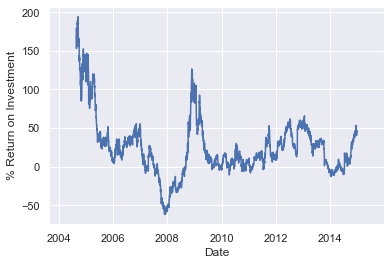

In [31]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

$$\text{图3-9：Google股票价格当期的投资回报率}$$

这可以帮助我们观察Google股票的总体特征：从图中可以看出，Google的股票在IPO刚刚成功之后最值得投资(图例的趋势很直观)，在2009年年中开始衰退。
3. 移动时间窗口   
Pandas处理时间序列数据结构的第3种操作时移动统计值(rolling statistics)。这些指标可以通过Series和DataFrame的rolling()属性来实现，它会返回与groupby操作类似的结果(参见3.9节)。移动视图(rolling view)使得许多累计操作成为可能。   
例如，可以通过下面的代码获取Google股票收盘价的一年期移动平均值和标准差(如图3-10所示）：

In [44]:
rolling = goog.rolling(365, center = True)

data = pd.DataFrame({'input' : goog,
                    'one-year rolling_mean' : rolling.mean(),
                    'one-year rolling_std' : rolling.std()},
                   index = pd.date_range('2004', periods = 6, freq = 'Y'))
ax = data.plot(style = ['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

TypeError: no numeric data to plot

$$\text{图3-10：Google股票收盘价的移动统计值}$$

与groupby操作一样，aggregate()和apply()方法都可以用来自定义移动计算。   

### 3.12.6 更多学习资料    

在这一节中，我们只是简单总结了Pandas时间序列工具的一些最常用功能，更详细的介绍请参考在线文档"Time Series / Date"(<http://pandas.pydata.org/pandas-docs/stable/timeseries.html>)节。   
另一个优秀的资源是Webs McKinney(Pandas创建者)所著的《利用Python进行数据分析》。虽然这本书已经有些年头了，当仍然是学习Pandas的好资源，尤其是这本书重点介绍了时间序列工具在商业与金融业务中的应用，作者用大量笔墨介绍了工作日历、时区和相关主题的具体内容。   
你当然也可以用IPython的帮助功能来浏览和深入塔索上面介绍过的函数与方法，我个人认为这是学校各种Python工具的最佳途径。   

### 3.12.7 案例：美国西雅图自行车统计数据的可视化    

下面我们来介绍一个比较复杂的时间序列数据，统计自2012年以来每天经过美国西雅图弗莱蒙特桥(<http://www.openstreetmap.org/#map=17/47.64813/-122.34965>)上的自行车的数量，数据有安装在桥东西两侧人行道的传感器采集。小时统计数据可以在(<http://data.seattle.gov/>)下载到，还有一个数据集的直接下载链接(<https://data.seettle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k>)。   
截至2016年夏，CSV数据可以用以下命令下载：

In [47]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

下好数据之后，可以用Pandas读取CSV文件获取一个DataFrame。我们将Date作为时间索引，并希望这些日期可以被自动解析：

In [3]:
import pandas as pd

data = pd.read_csv('D:\\Python\\Python Project\\Python_Data_Science_Handbook-master\\data\\FremontBridge.csv',
                  index_col = 'Date', parse_dates = True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


为了方便后面的计算，缩短数据集的列名，并新增一个Total列：

In [52]:
# data.colunms = ['Total', 'East', 'West']
# data['Total'] = data.eval(' East + West')

In [53]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,65678.000000,65678.000000,65678.000000
mean,113.397378,51.748302,61.649076
std,144.853108,66.803517,90.358214
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


1. 数据可视化   
通过可视化，我们可以对数据集有一些直观的认识。先为原始数据画图(如图3-11所示)：

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

Text(0, 0.5, 'Hourly Bicycle Count')

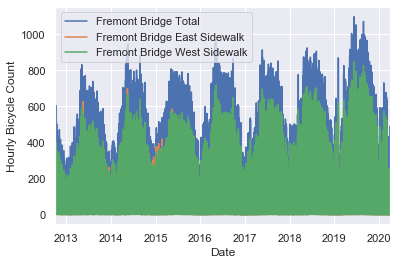

In [5]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

$$\text{图3-11：弗莱蒙特每小时通行的自行车数量}$$

在图中显示大约25000小时的样本数据对我们来说实在太多了，因此可以通过重新取样将数据转换成更大的颗粒度，比如按周累计(如图3-12所示)：

另一种对数据进行累计的简便方法是用pd.rolling_mean()<(**注：** 原书代码与正文不符。作者在正文中说"用pd.rolling_meaning()函数"，但作者代码中daily.rolling(30， center = True).sum()等价于pd.rolling_sum()。另外，Pandas文档提到，pd.rolling_mean方法即将被废弃，用DataFrame.rolling(center = False, window = 0).mean()的形式代替pd.rolling_mean()。考虑到原文图题"30天自行车数量"，因此按照30天的日均值作相应的修改——译者注)>函数求移动平均值。下面将计算数据的30天移动均值，并让图形在窗口居中显示(center = True)(如图3-13所示)。

Text(0, 0.5, 'mean of 30 days count')

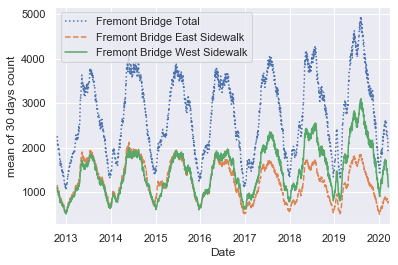

In [6]:
daily = data.resample('D').sum()
daily.rolling(30, center = True).mean().plot(style = [':', '--', '-'])
plt.ylabel("mean of 30 days count")

$$\text{图3-13：每30日自行车的移动日均值}$$

由于窗口太小，现在的图形还不很平滑。我们可以用一个移动均值的方法获得更平滑的图形，例如高斯分布时间窗口。下面的代码(可视化后如图3-14所示)将设置窗口的宽度(选择50天)和窗口高斯平滑的宽度(选择10天)：

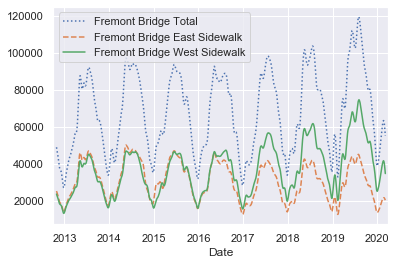

In [7]:
daily.rolling(50, center = True,
             win_type = 'gaussian').sum(std = 10).plot(style = [':', '--', '-'])

$$\text{图3-14：用高斯平滑方法处理每周自行车的移动均值}$$

2. 深入挖掘数据   
虽然我们已经从图3-14的平滑数据观察到了数据的总体趋势，但是它们还是隐藏了一些有趣的特征。例如，我们可能希望观察单日内的小时均值流量，这可以通过GroupBy(参见3.9节)操作来解决(如图3-15所示):

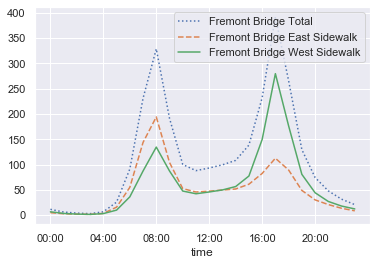

In [12]:
import numpy as np

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [':', '--', '-'])

$$\text{图3-15：每小时的自行车流量}$$

小时均值流量呈现十分明显的双峰分布特征，早间峰值在上午8点，晚间峰值在下午5点。这充分反映了过桥上下班往返自行车流量的特征。进一步分析会发现，桥西的高峰在早上(因为人们每天会到西雅图的市中心上班)，而桥东的高峰在下午(下班再从市中心离开)。   
我们可能还会对周内每天的变化产生兴趣，这是依然可以通过一个简单的groupby来实现(如图3-16所示)：

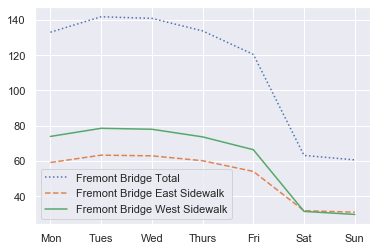

In [13]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs',
                   'Fri', 'Sat', 'Sun']
by_weekday.plot(style = [':', '--', '-'])

$$\text{}图3-16 每周每天的自行车流量$$

工作日与周末的自行车流量差十分显著，周一到周五通过的自行车差不多是周六、周日的两倍。   
看到这个特征之后，让我们用一个复合groupby来观察一周内工作日与双休日每小时的数据。用一个标签表示双休日和工作日的不同小时：

In [21]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Weekday 00:00:00              9.621483                      4.128900   
        01:00:00              4.770332                      2.145269   
        02:00:00              3.161637                      1.558568   
        03:00:00              2.723785                      1.420460   
        04:00:00              7.642967                      4.236829   
        05:00:00             33.205115                     20.605627   
        06:00:00            120.885934                     73.827110   
        07:00:00            310.576982                    194.613811   
        08:00:00            436.387212                    259.355499   
        09:00:00            235.477482                    128.752303   
        10:00:00            100.652508                     52.392528   
        11:00:00             75.551177                     39.194985   
        12:00:00             77.823951                     39.184749   
        13:00:00             84.002046                     41.262404   
        14:00:00             95.332481                     43.662916   
        15:00:00            138.440409                     57.403069   
        16:00:00            273.629156                     89.442455   
        17:00:00            506.679284                    136.197954   
        18:00:00            339.217903                    108.369821   
        19:00:00            159.310486                     57.548849   
        20:00:00             88.009207                     34.540665   
        21:00:00             55.467519                     23.836829   
        22:00:00             35.344757                     15.041944   
        23:00:00             22.138619                      9.030691   
Weekend 00:00:00             16.209719                      6.758312   
        01:00:00              9.407928                      4.191816   
        02:00:00              6.091495                      2.817010   
        03:00:00              3.502558                      1.754476   
        04:00:00              3.896419                      1.603581   
        05:00:00              7.303069                      3.934783   
        06:00:00             16.906650                      7.965473   
        07:00:00             32.232737                     16.736573   
        08:00:00             59.773657                     31.296675   
        09:00:00             81.245524                     42.524297   
        10:00:00             98.776215                     52.673913   
        11:00:00            119.074169                     62.079284   
        12:00:00            131.641944                     67.933504   
        13:00:00            138.204604                     70.581841   
        14:00:00            140.604859                     71.869565   
        15:00:00            138.736573                     70.598465   
        16:00:00            128.011509                     64.898977   
        17:00:00            106.313299                     53.305627   
        18:00:00             81.942455                     41.379795   
        19:00:00             55.292839                     27.292839   
        20:00:00             40.644501                     19.226343   
        21:00:00             29.065217                     13.556266   
        22:00:00             22.084399                      9.943734   
        23:00:00             17.508951                      7.240409   

                  Fremont Bridge West Sidewalk  
Weekday 00:00:00                      5.492583  
        01:00:00                      2.625064  
        02:00:00                      1.603069  
        03:00:00                      1.303325  
        04:00:00                      3.406138  
        05:00:00                     12.599488  
        06:00:00                     47.058824  
        07:00:00                    115.963171  
        08:00:00                    177.031714  

现在用一些Matplotlib工具(参见4.10节)画出两张图(如图3-17所示)：

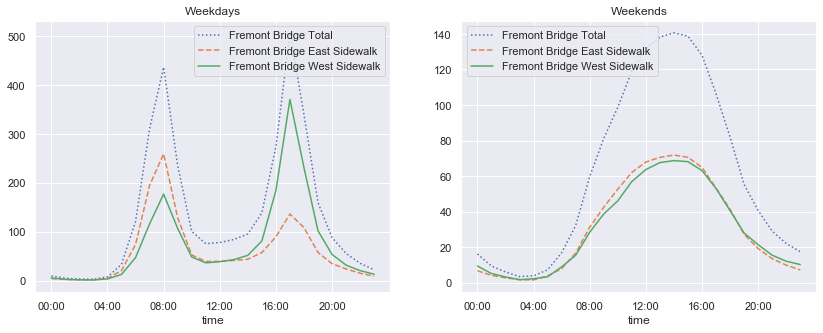

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
by_time.loc['Weekday'].plot(ax = ax[0], title = 'Weekdays',
                            xticks = hourly_ticks, style = [':', '--', '-'])
by_time.loc['Weekend'].plot(ax = ax[1], title = 'Weekends',
                            xticks = hourly_ticks, style = [':', '--', '-'])

$$\text{图3-17：工作日与双休日每小时的自行车流量}$$

结果很有意思，我们会发现工作日的自行车流量呈双峰通勤模式(bimodal commute pattern)，而到了周末就变成单峰娱乐模式(unimodal recreational pattern)。假如继续挖掘数据应该还会发现更多有趣的信息，比如研究天气、温度、一年中的不同时间以及其他因素对人们通勤模式的影响。关于更深入的分析内容，请参考"Is Seattle Really Seeing an Uptick In Cycling?"(<https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-upstick-in-cycling/>)，里面用数据的子集作了一些分析。我们将在5.6节继续使用这个数据集。   

## 3.13 高性能Pandas：eval()与query()    

前面的章节已经介绍过，Python数据科学生态环境的强大力量建立在NumPy与Pandas的基础之上，并通过直观的语法将基本操作转换成C语言：在NumPy里是向量化/广播运算，在Pandas里是分组型的运算。虽然这些抽象功能可以简洁高效地解决很多问题，但是它们经常需要创建中间对象，这样就会占用大量的计算时间与内存。   
Pandas从0.13版开始(2014年1月)就引入了实验性工具，让用户可以直接运行C语言速度的操作，不需要十分费力地配置中间数组。它们就是eval()和query()函数，都依赖于Numexpr(<https://github.com/pydata/numexpr>)程序包。我们将在下面的Notebook中演示其用法，big介绍一些使用时的注意事项。   

### 3.13.1 query()与eval()设计动机：复合代数式    

前面已经介绍过，NumPy与Pandas都支持快速的向量化运算。例如，你可以对下面两个数组进行求和：

In [26]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(int(1E6))
y = rng.rand(int(1E6))
%timeit x + y

3.06 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


就像在2.3节介绍的那样，这样做比普通的Python循环或列表综合要快得多：

In [31]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype = x.dtype, count = len(x))

315 ms ± 15.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


但是这种运算在处理复合代数式(compound expression)问题时的效率比较低，例如下面的表达式：

In [32]:
mask = (x > 0.5) & (y < 0.5)

由于NumPy会计算每一个代数子式，因此这个计算过程等价于：

In [33]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

也就是说，每段中间过程都需要显式地分配内存。如果x数组和y数组非常大，这么运算就会占用大量的时间和内存消耗。Numexpr程序可以让你在部委中间过程分配全部内存的前提下，完成元素到元素的负荷代数式运算。虽然Numexpr文档(<http://github.com/pydata/numexpr>)里提供了更详细的内容，但是简单点儿说，这个程序其实就是用一个NumPy风格的字符串代数式进行运算：

In [35]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

这样做的好处是，由于Numexpr在计算代数式时不需要为临时数组分配全部内存，因此计算比NumPy更高效，尤其适合处理大型数组。马上要介绍的Pandas的eval()和query()工具其实也是基于Numexpr实现的。   

### 3.13.2  用pandas.eval()实现高性能运算    

Pandas的eval()函数用字符串代数式实现了DataFrame的高性能运算，例如下面的DataFrame:

In [36]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                     for i in range(4))

如果要用普通的Pandas方法计算四个DataFrame的和，可以这么写：

In [37]:
%timeit df1 + df2 + df3 + df4

71.1 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


也可以通过pd.eval和字符串代数式计算并得到相同的结果：

In [38]:
%timeit pd.eval('df1 + df2 + df3 + df4')

33.2 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


这个eval()版本的代数式比普通方法快一倍(而且内存消耗更少)，结果也是一样的：

In [39]:
np.allclose(df1 + df2 + df3 + df4,
           pd.eval('df1 + df2 + df3 + df4'))

True

**pd.eval()支持的运算**   
从Pandas v0.16版开始，pd.eval()就支持许多运算了。为了演示这些运算，创建一个整数类型的DataFrame：

In [40]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                          for i in range(5))

**(1)算术运算符**。pd.eval()支持所有的算术运算符，例如：   

In [42]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

**(2)比较运算符**。pd.eval()支持所有的比较运算符，包括链式代数式(chained expression)：

In [44]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

**(3)位运算符**。pd.eval()支持&(与)和|(或)等位运算符：

In [47]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

**(4) 对象属性与索引**。pd.eval()可以通过obj.attr语法获取对象属性，通过obj[index]语法获取对象索引：

In [48]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

**(5) 其他运算**。 目前pd.eval()还不支持函数调用、条件语句、循环以及更复杂的运算。如果你想要进行这些运算，可以借助Numexpr来实现。

### 3.13.3 用DataFrame.eval()实现列间运算   

由于pd.eval()是Pandas的顶层函数，因此DataFrame有一个eval()方法可以做类似的运算。使用eval()方法的好处是可以借助列名称进行运算，示例如下：

In [49]:
df = pd.DataFrame(rng.rand(1000, 3), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


如果用前面介绍的pd.eval()，就可以通过下面的代数式计算这三列：

In [50]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = (pd.eval('(df.A + df.B) / (df.C - 1)'))
np.allclose(result1, result2)

True

而DataFrame()方法可以通过列名称实现简洁的代数式：

In [52]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

请注意，这里用列名称作为变量来计算代数式，结果同样是正确的。   
1. 用DataFrame.eval()新增列   
除了前面介绍的运算功能，DateFrame.eval()还恶意创建新的列。还用前面的DataFrame来演示，列名是'A'、'B'和'C'：

In [53]:
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


可以用df.eval()创建一个新的列'D'，然后赋给它其他列计算的值：

In [54]:
df.eval('D = (A + B) / C', inplace = True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


还可以修改已有的列：

2. DataFrame.eval()使用局部变量   
DataFrame.eval()方法还支持通过@符号使用Python的局部变量，如下所示：

In [55]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

@符号表示"这是一个变量名称而不是一个列名称"，从而然你灵活地用两个"命名空间"的资源(列名称的命名空间和Python对象的命名空间)计算代数式。需要注意的是，@符号只能在DataFrame.eval()方法中使用，而不能在pandas.eval()函数中使用，因为pandas.eval()函数只能获取一个(Pandas)命名空间的内容。   

### 3.13.4 DataFrame.query()方法    

DataFrame基于字符串代数的运算实现了另一个方法，被称为query()，例如：

In [57]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

和前面介绍过的DataFrame.eval()一样，这是一个用DataFrame列创建的代数式，但是不能用DataFrame.eval()语法(因为你要的结果是包含DataFrame的全部列)。不过，对于这种过滤运算，你可以用query()方法：

In [58]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

除了计算性能更优之外，这种方法的语法也比掩码代数式更好理解。需要注意的是query()方法也支持使用@斧蛤应用局部变量：

In [60]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

### 3.13.5 性能决定使用时机   
 
在考虑要不要使用这两个函数时，需要思考两个方面：计算时间和内存消耗，而内存消耗是更重要的影响因素。就像前面介绍的那样，每个涉及NumPy的DataFrame的复合代数式都会产生临时数组，例如：

In [61]:
x = df[(df.A < 0.5) & df.B < 0.5]

它基本等价于：

In [63]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

如果临时DataFrame的内存需求被你的系统内存还大(通常是几吉字节)，那么最好还是使用eval()和query()代数式。你可以通过下面的方法大概估算一下变量的内存消耗：

In [64]:
df.values.nbytes

32000

在性能方面，计时你没有使用最大的系统内存，eval()的计算速度也比普通方法快。现在的性能瓶颈变成了临时DataFrame与系统CPU的L1和L2缓存(在2016年依然是几兆字节)之间的对比了——如果系统缓存足够大，那么eval()就可以避免在不同缓存间缓慢地移动临时文件。在实际工作中，我们发现普通的计算方法与eval/query计算法方法在计算时间上的差异并非总是那么明显，普通方法在处理较小的数组时反而速度更快！eval/query方法的有点主要是节省内存，有时语法也更加简洁。   
我们已经介绍了eval()与query的绝大多数细节，若想了解更多的额信息，请参考Pandas文档。尤其需要注意的是，可以通过设置不同的解析器和引擎来执行这些查询，相关细节请参考Pandas文档中"Enhancing Performance"(<http://pandas.pydata.org/pandas-docs/dev/enhancingperf.html>)节。